
<div style="text-align: center; font-weight: bold; font-size: 36px;">
Before Machine Learning Volume 3 - Probability and Statistics - Code for algorithms in the book
</div>

On this notebook, we implement the algorithms covered in the book. They are:

1. Naive Bayes.
2. Markov Model with simulation.
3. Gibbs Sampler:  
   3.a. Multivariate Gaussian distribution.  
   3.b. Calculation of the blind spot.
4. Metropolis-Hastings algorithm:  
   4.a. Sample from an exponential distribution.  
   4.b. Find which thief to recruit with a hierarchical Bayesian model.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 32px;">
1 - Naive Bayes
</div>

<div style="text-align: center; font-weight: bold; font-size: 18px;">
1.1 - Algorithm implementation details
</div>


The `NaiveBayes` class implements a simple Naive Bayes classifier. This is a probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

### Methods

#### 1. `fit(self, X, y)`
This method trains the Naive Bayes classifier using the training data provided.

- **Parameters:**
  - `X`: A numpy array of shape `(n_samples, n_features)` containing the training input samples.
  - `y`: A numpy array of shape `(n_samples,)` containing the target values (class labels).

- **Steps:**
  1. The unique classes in the target variable `y` are determined and stored in `self.classes`.
  2. The number of features in the dataset is calculated and stored in `self.num_features`.
  3. The method initializes arrays to store the mean, variance, and prior probabilities for each class.
  4. For each class `c`, it calculates:
     - The mean of each feature (stored in `self.mean`).
     - The variance of each feature (stored in `self.var`).
     - The prior probability of the class (stored in `self.priors`).

#### 2. `_calculate_likelihood(self, class_idx, x)`
This private method calculates the likelihood \( P(x|c) \) for a given class index and input sample using the Gaussian Naive Bayes formula.

- **Parameters:**
  - `class_idx`: The index of the class.
  - `x`: A numpy array of shape `(n_features,)` representing the input sample.

- **Returns:**
  - The likelihood of the input sample given the class.

- **Steps:**
  1. Retrieve the mean and variance for the specified class.
  2. Apply the Gaussian Naive Bayes formula for each feature in the input sample.
  3. Return the product of the likelihoods for each feature.

#### 3. `_calculate_posterior(self, x)`
This private method calculates the posterior probability \( P(c|x) \) for all classes given an input sample.

- **Parameters:**
  - `x`: A numpy array of shape `(n_features,)` representing the input sample.

- **Returns:**
  - `posteriors`: A numpy array of shape `(n_classes,)` containing the posterior probabilities for all classes.

- **Steps:**
  1. Initialize an array to hold the posterior probabilities for each class.
  2. For each class `c`:
     - Calculate the prior probability \( P(c) \).
     - Calculate the likelihood \( P(x|c) \) using the `_calculate_likelihood` method.
     - Calculate the posterior probability using the formula \( \log(P(c|x)) = \log(P(c)) + \sum \log(P(x_i|c)) \).

#### 4. `predict(self, X)`
This method performs classification on an array of test vectors `X`.

- **Parameters:**
  - `X`: A numpy array of shape `(n_samples, n_features)` containing the input samples.

- **Returns:**
  - `y_pred`: A numpy array of shape `(n_samples,)` containing the predicted class labels for the input samples.

- **Steps:**
  1. For each sample in `X`, the class with the highest posterior probability is predicted using the `_calculate_posterior` method.
  2. The predicted classes are returned as a numpy array.

### Example Usage
```python
# Create a toy dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 0, 1, 1, 1, 0])

# Initialize the Naive Bayes classifier
nb = NaiveBayes()

# Fit the model on the dataset
nb.fit(X, y)

# Predict the classes for a new set of samples
X_test = np.array([[1, 2], [3, 4], [5, 6]])
y_pred = nb.predict(X_test)

print("Predicted classes:", y_pred)


In [46]:
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier according to X, y.
        
        Parameters:
        X : numpy array of shape (n_samples, n_features)
            The training input samples.
        y : numpy array of shape (n_samples,)
            The target values (class labels).
        """
        
        # Determine the unique classes in the target variable
        self.classes = np.unique(y)
        
        # Determine the number of features in the dataset
        self.num_features = X.shape[1]
        
        # Initialize mean, variance, and prior probabilities for each class
        # mean: mean for each feature in each class (shape: n_classes x n_features)
        # var: variance for each feature in each class (shape: n_classes x n_features)
        # priors: prior probability for each class (shape: n_classes)
        self.mean = np.zeros((len(self.classes), self.num_features))
        self.var = np.zeros((len(self.classes), self.num_features))
        self.priors = np.zeros(len(self.classes))
        
        # Calculate the mean, variance, and prior for each class
        for i, c in enumerate(self.classes):
            # Select all samples that belong to class c
            X_c = X[y == c]
            
            # Calculate the mean of each feature for class c
            self.mean[i, :] = X_c.mean(axis=0)
            
            # Calculate the variance of each feature for class c
            self.var[i, :] = X_c.var(axis=0)
            
            # Calculate the prior probability of class c (P(c))
            self.priors[i] = X_c.shape[0] / float(X.shape[0])

    def _calculate_likelihood(self, class_idx, x):
        """
        Calculate the likelihood P(x|c) for a given class index and input sample.
        
        Parameters:
        class_idx : int
            Index of the class.
        x : numpy array of shape (n_features,)
            Input sample.
            
        Returns:
        likelihood : float
            The likelihood of the input sample given the class.
        """
        
        # Retrieve the mean and variance for the given class
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        
        # Apply the Gaussian Naive Bayes formula for likelihood
        # P(x_i|c) = (1 / sqrt(2 * pi * var)) * exp(- (x_i - mean)^2 / (2 * var))
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        likelihood = numerator / denominator
        
        # The likelihood of the entire sample is the product of the likelihoods of each feature
        return np.prod(likelihood)

    def _calculate_posterior(self, x):
        """
        Calculate the posterior probability P(c|x) for all classes given an input sample.
        
        Parameters:
        x : numpy array of shape (n_features,)
            Input sample.
            
        Returns:
        posteriors : numpy array of shape (n_classes,)
            The posterior probabilities for all classes.
        """
        
        # Initialize an array to hold the posterior probabilities for each class
        posteriors = np.zeros(len(self.classes))
        
        for i, c in enumerate(self.classes):
            # Calculate the prior probability P(c)
            prior = np.log(self.priors[i])
            
            # Calculate the likelihood P(x|c) for class i
            likelihood = self._calculate_likelihood(i, x)
            
            # Calculate the posterior P(c|x) using the formula:
            # log(P(c|x)) = log(P(c)) + sum(log(P(x_i|c)))
            posteriors[i] = prior + np.sum(np.log(likelihood))
        
        return posteriors

    def predict(self, X):
        """
        Perform classification on an array of test vectors X.
        
        Parameters:
        X : numpy array of shape (n_samples, n_features)
            The input samples.
            
        Returns:
        y_pred : numpy array of shape (n_samples,)
            The predicted class labels for the input samples.
        """
        
        # Predict the class with the highest posterior probability for each sample
        y_pred = [self.classes[np.argmax(self._calculate_posterior(x))] for x in X]
        
        return np.array(y_pred)

# Example usage:
# Create a toy dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 0, 1, 1, 1, 0])

# Initialize the Naive Bayes classifier
nb = NaiveBayes()

# Fit the model on the dataset
nb.fit(X, y)

# Predict the classes for a new set of samples
X_test = np.array([[1, 2], [3, 4], [5, 6]])
y_pred = nb.predict(X_test)

print("Predicted classes:", y_pred)


Predicted classes: [0 1 1]


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 32px;">
2 - Markov Chains
</div>

<div style="text-align: center; font-weight: bold; font-size: 18px;">
2.1 - Algorithm implementation details
</div>

The provided code simulates the paths through a Markov chain defined by a transition matrix `P`. The goal is to model the transitions of an entity through various states until it reaches an absorbing state, labeled "Enter." Below is a detailed explanation of each part of the code.

### Functions and Processes

#### 1. **Defining the Transition Matrix**
The transition matrix `P` is a key component of the Markov chain, representing the probabilities of transitioning from one state to another.

- **Matrix Definition:**
  - Each row in the matrix corresponds to a current state.
  - Each column represents a possible next state.
  - The entry `P[i, j]` gives the probability of transitioning from state `i` to state `j`.
  
- **Steps:**
  1. The matrix is initialized with transition probabilities between different states, including the absorbing state "Enter."
  2. Each row is normalized to ensure that the probabilities sum to 1, which is a requirement for a valid transition matrix.

    ```python
    P = P / P.sum(axis=1, keepdims=True)
    ```

#### 2. **Mapping Indices to States**
A dictionary `index_to_state` is used to map the indices of the matrix to human-readable state names.

- **Steps:**
  1. Each index in the transition matrix corresponds to a specific state, e.g., `0` corresponds to "Start," and `7` corresponds to "Enter."
  2. This mapping allows for easier interpretation and output of the simulation results.

    ```python
    index_to_state = {
        0: 'Start', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '9', 7: 'Enter'
    }
    ```

#### 3. **Simulating a Single Path**
The `simulate_path()` function simulates a single path through the Markov chain.

- **Steps:**
  1. The simulation starts at the "Start" state.
  2. In each step, a new state is selected based on the current state's transition probabilities.
  3. This process continues until the "Enter" state is reached, at which point the path is complete.
  4. The function returns the sequence of states (path) that were visited during the simulation.


#### 4. **Running Multiple Simulations**
The code runs `num_simulations` (30,000 in this case) paths through the Markov chain to gather data on possible transitions and outcomes.

- **Steps:**
  1. The `simulate_path()` function is called repeatedly to generate a large number of paths.
  2. These paths are stored in a list for further analysis.

#### 5. **Analyzing the Most Common Paths**
The code identifies and counts the most common paths that were taken through the Markov chain.

- **Steps:**
  1. The `Counter` class from the `collections` module is used to count the occurrences of each unique path.
  2. The ten most common paths are identified and printed.

    ```python
    path_counts = Counter(tuple(path) for path in paths)
    most_common_paths = path_counts.most_common(10)
    ```

### Example Usage
Here's how the simulation results are interpreted and presented:

- **Most Common Paths:** The code outputs the ten most common sequences of states that were observed across the simulations.




In [55]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define the transition matrix
P = np.array([
    [0.0, 0.3, 0.25, 0.2, 0.25, 0.0, 0.0, 0.0],  # Start -> 0, 1, 2, 3
    [0.0, 0.0, 0.2, 0.3, 0.2, 0.28, 0.0, 0.01],    # 0 -> 1, 2, 3, 4
    [0.0, 0.3, 0.0, 0.3, 0.2, 0.2, 0.0, 0.0],    # 1 -> 0, 2, 3, 4
    [0.0, 0.25, 0.23, 0.0, 0.3, 0.2, 0.0, 0.02],  # 2 -> 0, 1, 3, 4
    [0.0, 0.2, 0.3, 0.25, 0.0, 0.25, 0.0, 0.0],  # 3 -> 0, 1, 2, 4
    [0.0, 0.15, 0.2, 0.2, 0.25, 0.0, 0.2, 0.0],  # 4 -> 0, 1, 2, 3, 8
    [0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.8],    # 8 -> Enter
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]     # Enter is absorbing
])

# Normalize each row to ensure the probabilities sum to 1
P = P / P.sum(axis=1, keepdims=True)

# Mapping of index to state
index_to_state = {
    0: 'Start', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '9', 7: 'Enter'
}

def simulate_path():
    current_state = 0  # Start state
    path = ['Start']
    while current_state != 7:  # Continue until 'Enter' state
        next_state = np.random.choice(np.arange(8), p=P[current_state])  # Correct the range
        path.append(index_to_state[next_state])
        current_state = next_state
    return path

# Simulate many paths
num_simulations = 30000
paths = [simulate_path() for _ in range(num_simulations)]

# Find most common paths
path_counts = Counter(tuple(path) for path in paths)
most_common_paths = path_counts.most_common(10)

# Prepare data for histogram
path_lengths = [len(path) for path in paths]

# Output the most common paths
print("Most common paths:")
for path, count in most_common_paths:
    print(f"Path: {' -> '.join(path)}, Count: {count}")

Most common paths:
Path: Start -> 0 -> 4 -> 9 -> Enter, Count: 412
Path: Start -> 3 -> 4 -> 9 -> Enter, Count: 320
Path: Start -> 1 -> 4 -> 9 -> Enter, Count: 243
Path: Start -> 2 -> 4 -> 9 -> Enter, Count: 199
Path: Start -> 2 -> Enter, Count: 111
Path: Start -> 1 -> 0 -> 4 -> 9 -> Enter, Count: 111
Path: Start -> 0 -> Enter, Count: 95
Path: Start -> 3 -> 1 -> 4 -> 9 -> Enter, Count: 89
Path: Start -> 0 -> 2 -> 4 -> 9 -> Enter, Count: 85
Path: Start -> 2 -> 3 -> 4 -> 9 -> Enter, Count: 76


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 32px;">
3 - Gibbs sampler
</div>

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.1 - Algorithm implementation details
</div>


The provided code implements a Gibbs sampler for generating samples from a multivariate Gaussian distribution and provides several functions to visualize the generated samples. Below is a detailed explanation of each part of the code.

### Functions and Processes

#### 1. `gibbs_sampler(mu, sigma, num_samples, burn_in=100)`
This function performs Gibbs sampling to generate samples from a multivariate Gaussian distribution.

- **Parameters:**
  - `mu`: A numpy array representing the mean vector of the distribution.
  - `sigma`: A numpy array representing the covariance matrix of the distribution.
  - `num_samples`: An integer specifying the number of samples to generate.
  - `burn_in`: An integer representing the number of initial samples to discard (burn-in period).

- **Returns:**
  - `samples`: A numpy array of shape `(num_samples, n_variables)` containing the generated samples.

- **Steps:**
  1. **Initialization:**
     - Determine the number of variables (dimensions) from the length of `mu`.
     - Create an array to store the generated samples.
     - Initialize the starting point for the Gibbs sampler with random values.
  
  2. **Gibbs Sampling Process:**
     - Iterate over the number of samples plus the burn-in period.
     - For each variable, calculate the conditional mean and variance given the other variables.
     - Sample from the conditional normal distribution for each variable.
  
  3. **Storing Samples:**
     - After the burn-in period, store each generated sample in the samples array.

#### 2. `plot_trace(samples)`
This function generates trace plots for each variable in the samples.

- **Parameters:**
  - `samples`: A numpy array containing the samples generated by the Gibbs sampler.

- **Steps:**
  1. Determine the number of variables (dimensions) from the shape of `samples`.
  2. For each variable, generate a trace plot showing the sampled values over the iterations.
  3. Display the trace plots in a grid layout.

#### 3. `plot_acf(samples)`
This function generates autocorrelation function (ACF) plots for each variable in the samples.

- **Parameters:**
  - `samples`: A numpy array containing the samples generated by the Gibbs sampler.

- **Steps:**
  1. Determine the number of variables (dimensions) from the shape of `samples`.
  2. For each variable, calculate the ACF for different lags and generate a plot.
  3. Display the ACF plots in a grid layout.

#### 4. `plot_histogram(samples)`
This function generates histograms for each variable in the samples.

- **Parameters:**
  - `samples`: A numpy array containing the samples generated by the Gibbs sampler.

- **Steps:**
  1. Determine the number of variables (dimensions) from the shape of `samples`.
  2. For each variable, generate a histogram showing the distribution of the sampled values.
  3. Display the histograms in a grid layout.

#### 5. `plot_scatter(samples)`
This function generates scatter plots for each pair of variables in the samples.

- **Parameters:**
  - `samples`: A numpy array containing the samples generated by the Gibbs sampler.

- **Steps:**
  1. Determine the number of variables (dimensions) from the shape of `samples`.
  2. For each pair of variables, generate a scatter plot showing the relationship between them.
  3. Display the scatter plots in a grid layout.

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_sampler(mu, sigma, num_samples, burn_in=100):
    """
    Gibbs sampler for a multivariate Gaussian distribution.

    Parameters:
    mu (numpy.ndarray): Mean vector of the distribution.
    sigma (numpy.ndarray): Covariance matrix of the distribution.
    num_samples (int): Number of samples to generate.
    burn_in (int): Number of initial samples to discard (burn-in period).

    Returns:
    samples (numpy.ndarray): Array of shape (num_samples, n_variables) containing the generated samples.
    """
    n_variables = len(mu)  # Number of variables (dimensions)
    samples = np.zeros((num_samples, n_variables))  # Array to store the generated samples
    
    # Initialize the starting point for the Gibbs sampler with random values
    x = np.random.randn(n_variables)
    
    # Run the Gibbs sampler
    for i in range(num_samples + burn_in):
        for j in range(n_variables):
            # Define conditional distribution parameters for x_j given the other variables
            j_indices = np.delete(np.arange(n_variables), j)  # Indices of all other variables except j
            sigma_jj = sigma[j, j]  # Variance of the j-th variable
            sigma_j = sigma[j, j_indices]  # Covariances between the j-th variable and others
            sigma_others = sigma[j_indices][:, j_indices]  # Covariance matrix for the other variables
            
            # Calculate the conditional mean for x_j given the other variables
            mu_conditional = mu[j] + sigma_j @ np.linalg.inv(sigma_others) @ (x[j_indices] - mu[j_indices])
            # Calculate the conditional variance for x_j given the other variables
            sigma_conditional = np.sqrt(sigma_jj - sigma_j @ np.linalg.inv(sigma_others) @ sigma_j.T)
            
            # Sample from the conditional normal distribution for x_j
            x[j] = np.random.normal(mu_conditional, sigma_conditional)
        
        # Store the sample after the burn-in period
        if i >= burn_in:
            samples[i - burn_in] = x
    
    return samples

def plot_trace(samples):
    """
    Plot the trace plots for each variable in the samples.

    Parameters:
    samples (numpy.ndarray): Array of samples generated by the Gibbs sampler.
    """
    n_variables = samples.shape[1]  # Number of variables (dimensions)
    n_rows = (n_variables + 1) // 2  # Number of rows for the plots (2 plots per row)
    
    plt.figure(figsize=(14, 6 * n_rows))
    
    # Generate a trace plot for each variable
    for i in range(n_variables):
        plt.subplot(n_rows, 2, i + 1)
        plt.plot(samples[:, i])
        plt.title(f"Trace Plot for Variable {i+1}")
        plt.xlabel("Iteration")
        plt.ylabel(f"Variable {i+1}")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_acf(samples):
    """
    Plot the autocorrelation function (ACF) for each variable in the samples.

    Parameters:
    samples (numpy.ndarray): Array of samples generated by the Gibbs sampler.
    """
    n_variables = samples.shape[1]  # Number of variables (dimensions)
    n_rows = (n_variables + 1) // 2  # Number of rows for the plots (2 plots per row)
    
    plt.figure(figsize=(14, 6 * n_rows))
    
    # Generate an ACF plot for each variable
    for i in range(n_variables):
        plt.subplot(n_rows, 2, i + 1)
        x = samples[:, i]
        n = len(x)
        mean_x = np.mean(x)
        acf = [1]  # ACF starts with 1 at lag 0
        for lag in range(1, 41):
            acf_lag = np.sum((x[:n - lag] - mean_x) * (x[lag:] - mean_x)) / np.sum((x - mean_x) ** 2)
            acf.append(acf_lag)
        
        plt.stem(range(41), acf)
        plt.xlabel('Lag')
        plt.ylabel(f'ACF (Variable {i+1})')
        plt.title(f'ACF for Variable {i+1}')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_histogram(samples):
    """
    Plot histograms for each variable in the samples.

    Parameters:
    samples (numpy.ndarray): Array of samples generated by the Gibbs sampler.
    """
    n_variables = samples.shape[1]  # Number of variables (dimensions)
    n_rows = (n_variables + 1) // 2  # Number of rows for the plots (2 plots per row)
    
    plt.figure(figsize=(14, 6 * n_rows))
    
    # Generate a histogram for each variable
    for i in range(n_variables):
        plt.subplot(n_rows, 2, i + 1)
        plt.hist(samples[:, i], bins=50, density=True, alpha=0.6)
        plt.title(f"Histogram of Variable {i+1}")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_scatter(samples):
    """
    Plot scatter plots for each pair of variables in the samples.

    Parameters:
    samples (numpy.ndarray): Array of samples generated by the Gibbs sampler.
    """
    n_variables = samples.shape[1]  # Number of variables (dimensions)
    
    # Generate scatter plots for each pair of variables
    if n_variables > 1:
        scatter_pairs = [(i, j) for i in range(n_variables) for j in range(i + 1, n_variables)]
        n_rows = (len(scatter_pairs) + 1) // 2  # Ensure we have enough rows for pairs
        
        plt.figure(figsize=(14, 6 * n_rows))
        
        for idx, (i, j) in enumerate(scatter_pairs):
            plt.subplot(n_rows, 2, idx + 1)
            plt.plot(samples[:, i], samples[:, j], 'o', markersize=2)
            plt.title(f"Variable {i+1} vs Variable {j+1} Scatter Plot")
            plt.xlabel(f"Variable {i+1}")
            plt.ylabel(f"Variable {j+1}")
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 28px;">
3.a - Gibbs sampler example for Bivariate Gaussian Distribution 
</div>

In [62]:
# Define parameters for the bivariate Gaussian distribution
mu_2d = np.array([5, 10])  # Mean vector for 2 variables
sigma_2d = np.array([[1, 0.5], [0.5, 2]])  # Covariance matrix for 2 variables

# Number of samples and burn-in period
num_samples_2d = 10000
burn_in_2d = 1000

# Generate samples using Gibbs sampling
samples_2d = gibbs_sampler(mu_2d, sigma_2d, num_samples_2d, burn_in_2d)

# Plot the results for the bivariate case


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.a.1 - Gibbs sampler example for Bivariate Gaussian Distribution - Trace plots
</div>

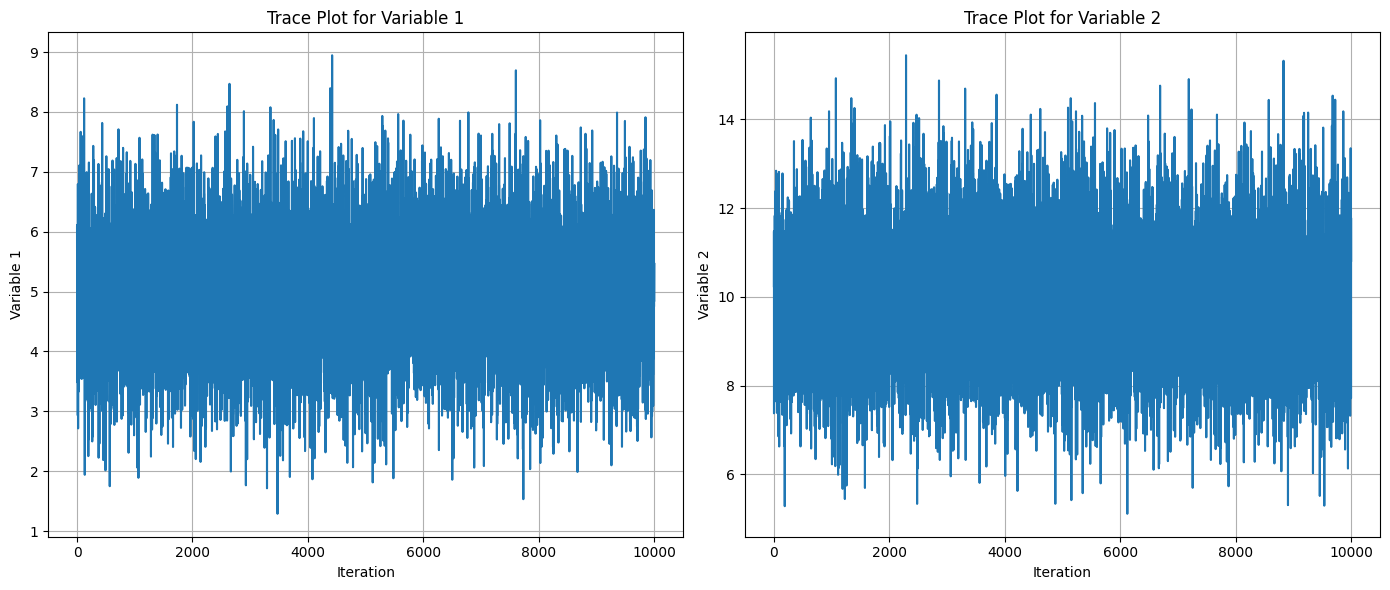

In [63]:
plot_trace(samples_2d)

###  Trace Plot for Variable 1
- **Range of Values**: The values of Variable 1 fluctuate within a range of approximately 2 to 9.
- **Behavior Over Iterations**: The plot shows a lot of variability and rapid fluctuations within this range, indicating that the Gibbs sampler is exploring the parameter space well.
- **Stationarity**: The plot does not show any obvious trend (like an increasing or decreasing trend) over time, which suggests that the sampler has reached a stationary distribution relatively quickly. This indicates that the burn-in period (the initial phase where the sampler might not yet be representative of the target distribution) has passed, and the samples are being drawn from the desired distribution.

###  Trace Plot for Variable 2
- **Range of Values**: The values of Variable 2 fluctuate within a range of approximately 6 to 14.
- **Behavior Over Iterations**: Similar to Variable 1, Variable 2 shows rapid fluctuations within its range. The values appear to move freely across the range, indicating good mixing.
- **Stationarity**: As with Variable 1, the trace for Variable 2 does not exhibit any clear trend over time, suggesting that the chain has reached stationarity.

###  General Observations
- **Mixing**: Both variables show good mixing, as indicated by the lack of long periods where the values are stuck at one level. Good mixing implies that the Gibbs sampler is effectively exploring the entire distribution.
- **Convergence**: The absence of trends or patterns in either plot suggests that the Gibbs sampler has likely converged to the target distribution. Both variables are sampling values from their respective stationary distributions.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.a.2 - Gibbs sampler example for Bivariate Gaussian Distribution - Histograms
</div>

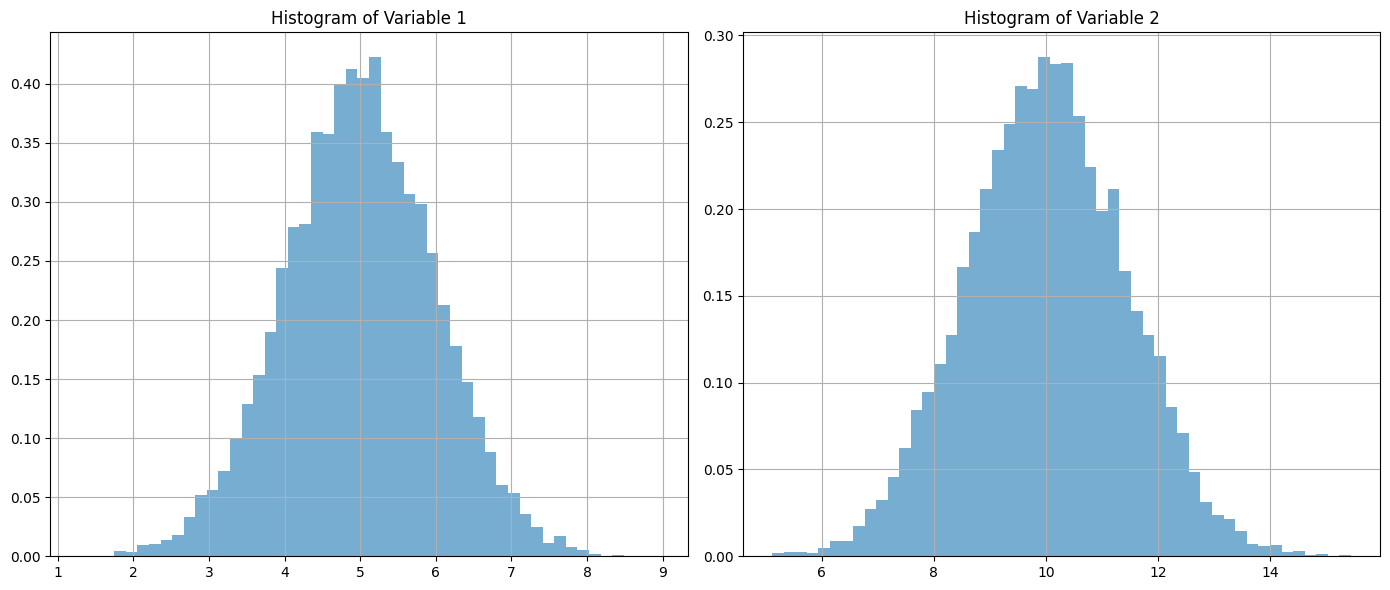

In [64]:
plot_histogram(samples_2d)

###  Histogram for Variable 1
- **Shape**: The histogram for Variable 1 shows a symmetric, bell-shaped distribution, which is characteristic of a Gaussian (normal) distribution. This suggests that the samples drawn for Variable 1 are indeed coming from a normal distribution.
- **Center**: The peak of the histogram is centered around the value of approximately 5, indicating that the mean of the samples is close to this value.
- **Spread**: The spread of the distribution (as indicated by the range on the x-axis) is between approximately 2 and 8. This spread corresponds to the standard deviation of the distribution, which determines how much the data varies around the mean.

###  Histogram for Variable 2
- **Shape**: Similar to Variable 1, the histogram for Variable 2 also exhibits a symmetric, bell-shaped distribution, confirming that Variable 2 is being sampled from a Gaussian distribution.
- **Center**: The peak of this histogram is centered around a value of approximately 10, which is likely the mean of the Gaussian distribution for Variable 2.
- **Spread**: The distribution for Variable 2 has a range roughly between 6 and 14, indicating a wider spread compared to Variable 1. This suggests that the variance (or standard deviation) for Variable 2 is higher than that for Variable 1.

###  General Observations
- **Gaussian Distribution**: Both histograms reflect the expected Gaussian distribution, which is consistent with the properties of the variables if they were drawn from a multivariate normal distribution.
- **Comparison of Variables**: Variable 2 has a mean that is higher and a variance that is larger than Variable 1, as indicated by the shift in the center and the greater spread in the histogram. This aligns with the difference in the shapes and spreads of the two histograms.

### Conclusion
The histograms confirm that the Gibbs sampler is successfully sampling from the intended multivariate Gaussian distribution for both variables. The shape, center, and spread of each histogram provide a clear picture of the underlying distribution for each variable, showing that Variable 1 has a lower mean and smaller variance compared to Variable 2.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.a.3 - Gibbs sampler example for Bivariate Gaussian Distribution - Scatter
</div>

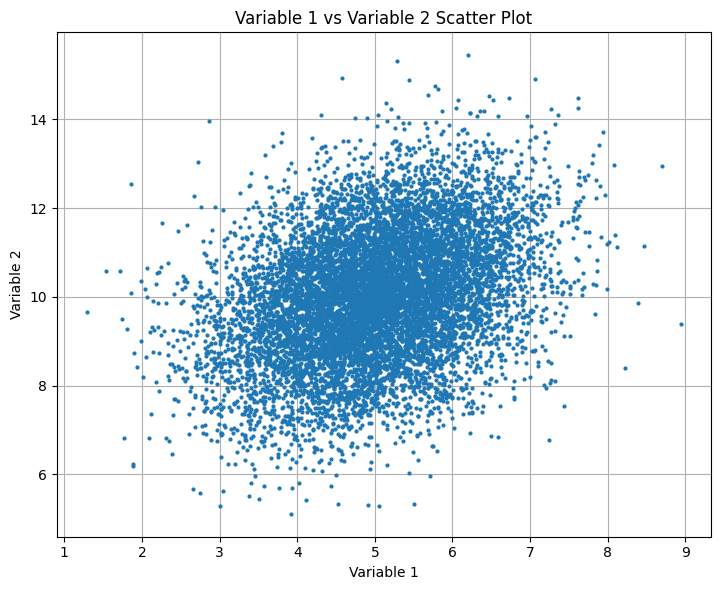

In [111]:
plot_scatter(samples_2d)


The scatter plot shows a roughly elliptical shape with a moderate positive correlation between Variable 1 and Variable 2. This pattern is to be expected, as the samples were drawn from a multivariate Gaussian distribution. In a multivariate Gaussian, the joint distribution of the variables typically exhibits an elliptical spread, reflecting the correlation structure between them. The plot confirms that the Gibbs sampler has correctly captured this relationship.

&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.a.4 - Gibbs sampler example for Bivariate Gaussian Distribution - ACF
</div>

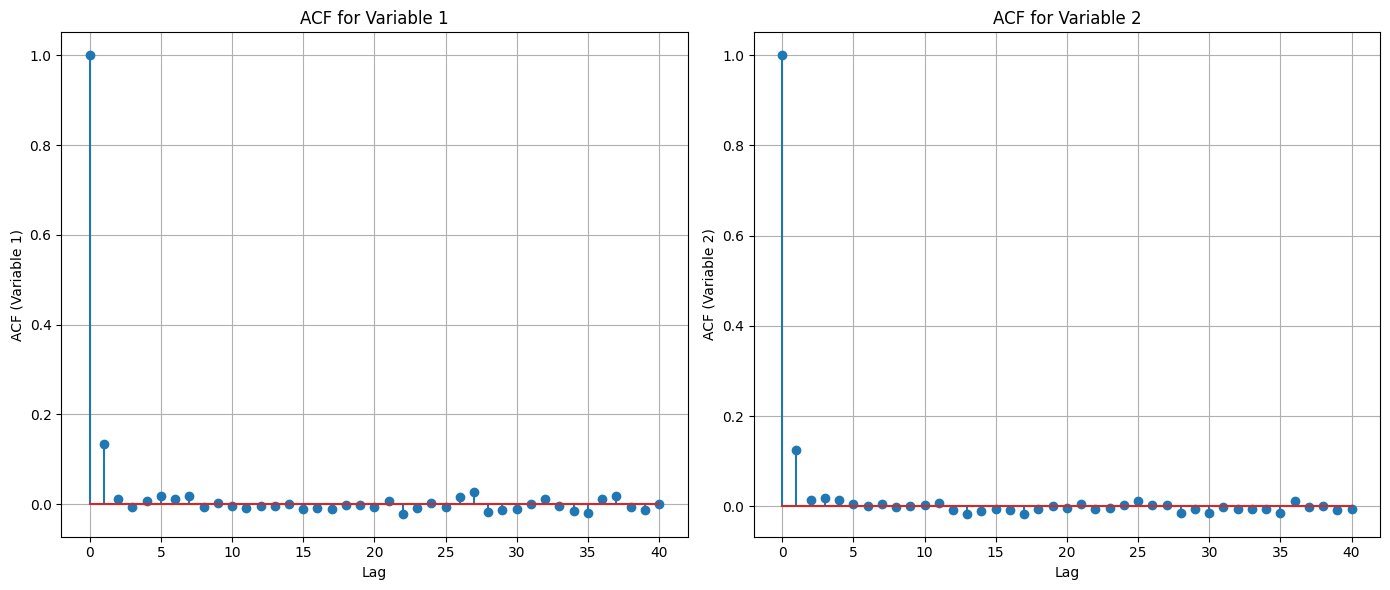

In [66]:
plot_acf(samples_2d)


###  ACF Plot for Variable 1
- **Lag 0**: The autocorrelation at lag 0 is 1, which is expected because any time series is perfectly correlated with itself at lag 0.
- **Lag 1 and Beyond**: The autocorrelation drops sharply after the first lag. The ACF values for subsequent lags (lag 1 and higher) are close to zero, with only a small spike at lag 1. This indicates that the samples of Variable 1 are almost independent of each other, with minimal correlation between consecutive samples.
- **Interpretation**: The rapid drop in autocorrelation suggests that the Gibbs sampler is producing nearly independent samples for Variable 1 after the initial lag. This is a good indication that the Markov chain is mixing well and that the effective sample size is high.

###  ACF Plot for Variable 2
- **Lag 0**: Similar to Variable 1, the autocorrelation at lag 0 is 1.
- **Lag 1 and Beyond**: The ACF for Variable 2 also drops sharply after the first lag, with values close to zero for subsequent lags. There is a small spike at lag 1, similar to Variable 1, but overall, the autocorrelation remains low.
- **Interpretation**: The ACF plot for Variable 2 indicates that the samples are also nearly independent, with minimal autocorrelation after the first lag. This suggests good mixing and effective sampling, similar to Variable 1.

###  General Observations
- **Low Autocorrelation**: Both variables exhibit low autocorrelation after the first lag, which is a positive sign in MCMC sampling. Low autocorrelation means that each sample is almost independent of the previous samples, leading to more reliable estimates of the target distribution.
- **Effective Sample Size**: The low autocorrelation implies that the effective sample size is large, which enhances the quality of the posterior estimates derived from the Gibbs sampler.

### Conclusion
The ACF plots for both variables indicate that the Gibbs sampler is performing well, producing nearly independent samples with minimal autocorrelation after the first lag. This is a strong indication of good mixing and effective sampling, which are essential for the reliability of the MCMC results. The ACF plots confirm that the Markov chain has likely reached its stationary distribution, and the samples can be used to accurately estimate the properties of the underlying Gaussian distributions.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 28px;">
3.b - Gibbs sampler example for camera angles
</div>

## Gibbs Sampler for Camera Blind Spot Detection

The provided code implements a Gibbs sampler adapted to generate samples from a multivariate Gaussian distribution with camera angles restricted between 0 and 360 degrees. Additionally, the code calculates the conditional probability that cameras 3 and 4 are in a blind spot, given that cameras 1 and 2 are in a blind spot.

### Functions and Processes

#### 1. `is_blind_spot(angle)`
This function determines if a given camera angle is in a blind spot.

- **Parameters:**
  - `angle`: A float representing the angle of the camera.
  
- **Returns:**
  - `1` if the angle is within the blind spot range, and `0` otherwise.

- **Steps:**
  1. **Blind Spot Definition:**
     - The blind spot is defined as any angle less than 35 degrees or greater than 115 degrees.
     - The function returns `1` if the angle falls within these ranges, otherwise it returns `0`.

#### 2. `gibbs_sampler(mu, sigma, num_samples, burn_in=100)`
This function performs Gibbs sampling to generate samples from a multivariate Gaussian distribution, specifically adapted for angles constrained between 0 and 360 degrees. The function uses rejection sampling to discard and redraw unwanted values.

- **Parameters:**
  - `mu`: A numpy array representing the mean vector of the distribution.
  - `sigma`: A numpy array representing the covariance matrix of the distribution.
  - `num_samples`: An integer specifying the number of samples to generate.
  - `burn_in`: An integer representing the number of initial samples to discard (burn-in period).

- **Returns:**
  - `samples`: A numpy array of shape `(num_samples, n_variables)` containing the generated samples.

- **Steps:**
  1. **Initialization:**
     - Determine the number of variables (dimensions) from the length of `mu`.
     - Create an array to store the generated samples.
     - Initialize the starting point for the Gibbs sampler with random values between 0 and 360 degrees.

  2. **Gibbs Sampling Process:**
     - Iterate over the number of samples plus the burn-in period.
     - For each variable, calculate the conditional mean and variance given the other variables.
     - Sample from the conditional normal distribution for each variable.
     - If the sampled value meets the criteria (between 0 and 360 degrees), store it; otherwise, redraw the sample.

  3. **Storing Samples:**
     - After the burn-in period, store each generated sample in the samples array.

#### 3. `calculate_blind_spot_probability(samples)`
This function calculates the probability that cameras 3 and 4 are in a blind spot given that cameras 1 and 2 are in a blind spot.

- **Parameters:**
  - `samples`: A numpy array containing the samples generated by the Gibbs sampler.

- **Returns:**
  - `probability`: A float representing the conditional probability \( P(I(C_3) = 1 \cap I(C_4) = 1 | I(C_1) = 1 \cap I(C_2) = 1) \).

- **Steps:**
  1. **Apply the Blind Spot Indicator:**
     - Convert the sampled angles into binary values (`1` for blind spot, `0` otherwise) using the `is_blind_spot` function.

  2. **Count the Relevant Conditions:**
     - Count the number of samples where both cameras 1 and 2 are in a blind spot.
     - Count the number of samples where all four cameras are in a blind spot.

  3. **Calculate the Conditional Probability:**
     - Calculate the probability by dividing the number of samples where all cameras are in a blind spot by the number of samples where cameras 1 and 2 are in a blind spot.
     - If there are no samples where cameras 1 and 2 are in a blind spot, return a probability of 0 to avoid division by zero.


In [96]:
import numpy as np
import matplotlib.pyplot as plt

def is_blind_spot(angle):
    """
    Function to determine if a camera is in a blind spot.
    
    Parameters:
    angle (float): Angle of the camera.
    
    Returns:
    int: 1 if the angle is in the blind spot, 0 otherwise.
    """
    return 1 if angle < 35 or angle > 115 else 0

def gibbs_sampler(mu, sigma, num_samples, burn_in=100):
    """
    Gibbs sampler for a multivariate Gaussian distribution, adapted for angles between 0 and 360 degrees,
    with rejection sampling to discard and redraw unwanted values.

    Parameters:
    mu (numpy.ndarray): Mean vector of the distribution.
    sigma (numpy.ndarray): Covariance matrix of the distribution.
    num_samples (int): Number of samples to generate.
    burn_in (int): Number of initial samples to discard (burn-in period).

    Returns:
    samples (numpy.ndarray): Array of shape (num_samples, n_variables) containing the generated samples.
    """
    n_variables = len(mu)  # Number of variables (dimensions)
    samples = np.zeros((num_samples, n_variables))  # Array to store the generated samples
    
    # Initialize the starting point for the Gibbs sampler with random values between 0 and 360
    x = np.random.uniform(0, 360, n_variables)
    
    # Run the Gibbs sampler
    for i in range(num_samples + burn_in):
        for j in range(n_variables):
            # Define conditional distribution parameters for x_j given the other variables
            j_indices = np.delete(np.arange(n_variables), j)  # Indices of all other variables except j
            sigma_jj = sigma[j, j]  # Variance of the j-th variable
            sigma_j = sigma[j, j_indices]  # Covariances between the j-th variable and others
            sigma_others = sigma[j_indices][:, j_indices]  # Covariance matrix for the other variables
            
            # Calculate the conditional mean for x_j given the other variables
            mu_conditional = mu[j] + sigma_j @ np.linalg.inv(sigma_others) @ (x[j_indices] - mu[j_indices])
            # Calculate the conditional variance for x_j given the other variables
            sigma_conditional = np.sqrt(sigma_jj - sigma_j @ np.linalg.inv(sigma_others) @ sigma_j.T)
            
            # Sample from the conditional normal distribution for x_j
            while True:
                x_j_new = np.random.normal(mu_conditional, sigma_conditional) % 360  # Apply modulus to ensure angle stays within [0, 360]
                
                # Rejection sampling condition: 
                if 0 <= x_j_new <= 360:
                    x[j] = x_j_new
                    break  # Exit loop when valid sample is found
        
        # Store the sample after the burn-in period
        if i >= burn_in:
            samples[i - burn_in] = x
    
    return samples

def calculate_blind_spot_probability(samples):
    """
    Calculate the probability that cameras 3 and 4 are in a blind spot given that cameras 1 and 2 are in a blind spot.

    Parameters:
    samples (numpy.ndarray): Array of samples generated by the Gibbs sampler.

    Returns:
    float: The conditional probability P(I(C3) = 1 ∩ I(C4) = 1 | I(C1) = 1 ∩ I(C2) = 1).
    """
    # Apply the blind spot indicator function to the samples
    blind_spots = np.array([[is_blind_spot(angle) for angle in sample] for sample in samples])

    # Count the number of times cameras 1 and 2 are both in a blind spot
    condition_1_and_2 = np.sum((blind_spots[:, 0] == 1) & (blind_spots[:, 1] == 1))
    
    # Count the number of times all cameras 1, 2, 3, and 4 are in a blind spot
    condition_all = np.sum((blind_spots[:, 0] == 1) & (blind_spots[:, 1] == 1) & 
                           (blind_spots[:, 2] == 1) & (blind_spots[:, 3] == 1))
    
    # Calculate the conditional probability
    if condition_1_and_2 > 0:
        probability = condition_all / condition_1_and_2
    else:
        probability = 0.0  # Avoid division by zero
    
    return probability

In [98]:
data_4d = np.array([
    [160, 150, 140, 45],
    [150, 140, 130, 60],
    [140, 130, 120, 0],
    [330, 120, 110, 10],
    [120, 110, 100, 20],
    [110, 100, 90, 30],
    [100, 90, 80, 40],
    [90, 80, 70, 50],
    [80, 70, 60, 60],
    [70, 60, 50, 70],
    [60, 50, 200, 80],
    [50, 40, 30, 90],
    [40, 30, 20, 100],
    [30, 20, 10, 110],
    [20, 10, 5, 120],
    [10, 5, 0, 130],
    [5, 0, 181, 140],
    [0, 45, 120, 150],
    [33, 57, 197, 160]
])

# Estimate the mean vector and covariance matrix from the 4-variable data
mu_4d = np.mean(data_4d, axis=0)
sigma_4d = np.cov(data_4d, rowvar=False)

samples = gibbs_sampler(mu_4d, sigma_4d, num_samples=10000)

&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.b.1 - Gibbs sampler example for camera angles - Trace plots
</div>

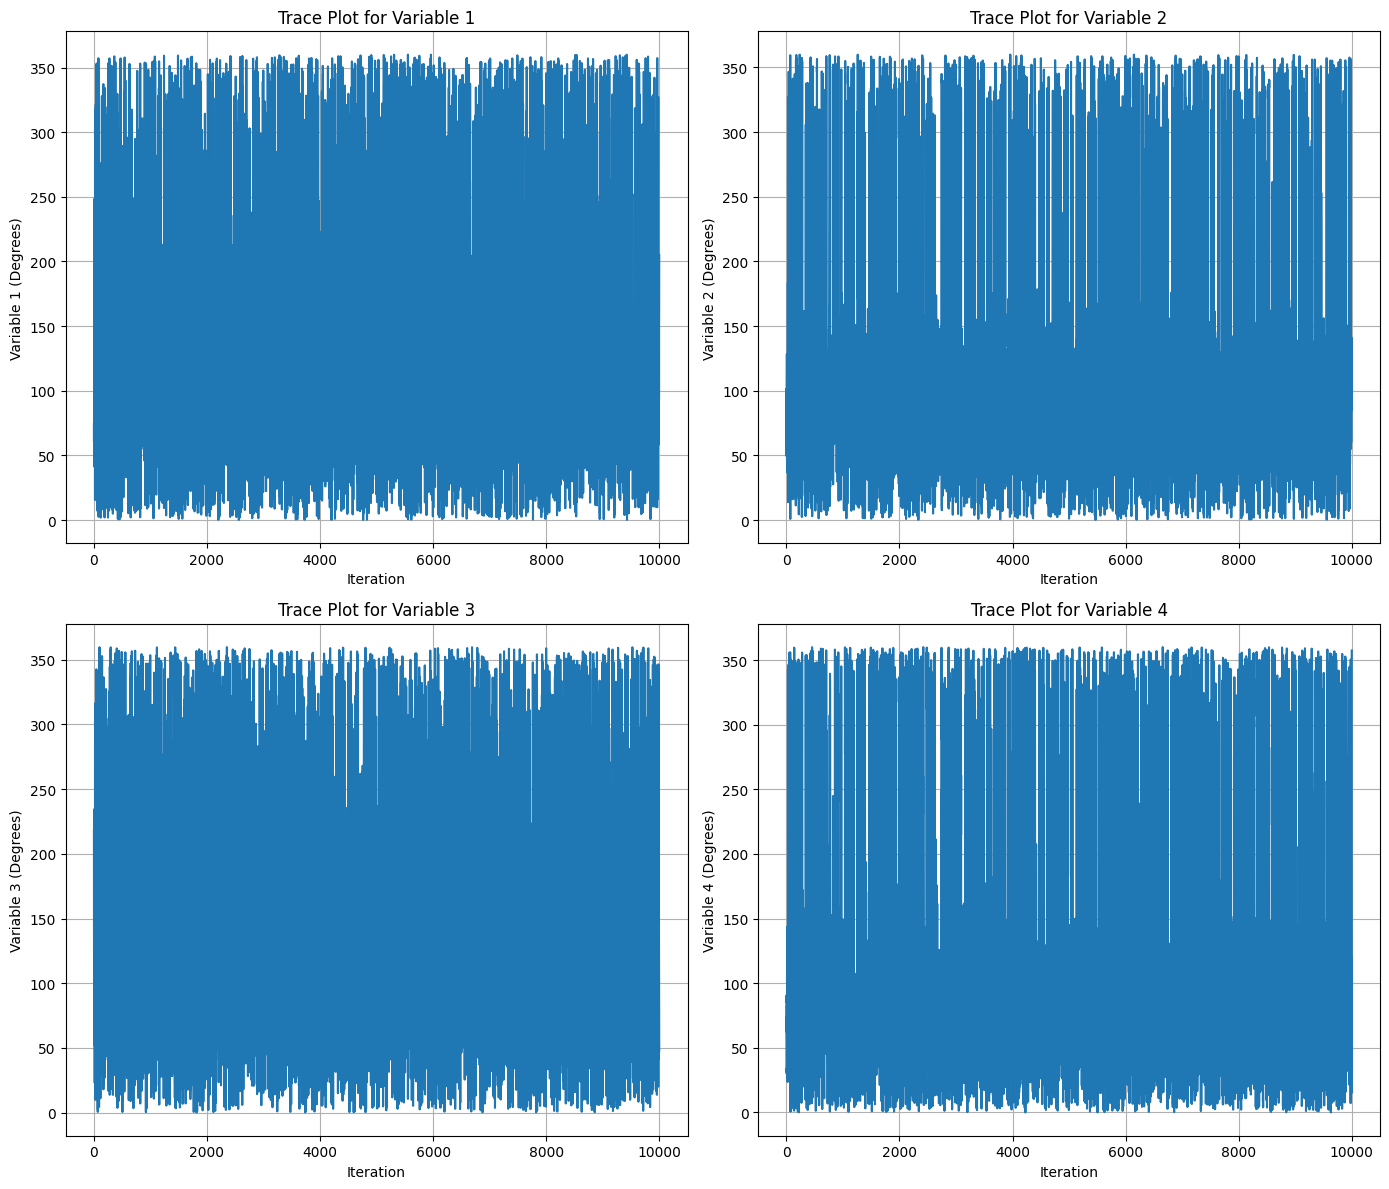

In [99]:
plot_trace(samples)

The trace plots show the sampled angles (in degrees) for four variables (representing four cameras) over 10,000 iterations using the Gibbs sampling process.

#### Key Observations:

1. **High Variability Across Iterations:**
   - The angles for all four cameras vary widely, covering the full range from 0 to 360 degrees. This indicates that the Gibbs sampler is effectively exploring the entire space of possible camera angles.

2. **Frequent Transitions:**
   - The trace plots exhibit frequent and rapid changes in angle values, suggesting good mixing of the Gibbs sampler. The sampler does not get stuck in a particular range of angles but moves freely across the entire range.

3. **No Apparent Trends or Patterns:**
   - The sampled angles do not show any obvious trends or clustering, which is typical for a well-functioning Gibbs sampler. This randomness indicates that each sample is independent and drawn based on the previous sample.

4. **Potential Blind Spot Exploration:**
   - Given the context of camera angles and blind spots, these trace plots suggest that the sampler frequently samples angles that could result in blind spots (angles less than 35 degrees or greater than 115 degrees).

#### Conclusion:

The trace plots indicate that the Gibbs sampler is effectively covering the entire angular space, ensuring that all potential camera configurations, including those that might lead to surveillance blind spots, are well-represented. The good mixing and variability in the plots suggest that the samples are likely representative of the true distribution, which is crucial for accurate probability estimation of blind spots.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.b.2 - Gibbs sampler example for camera angles - Histograms plots
</div>

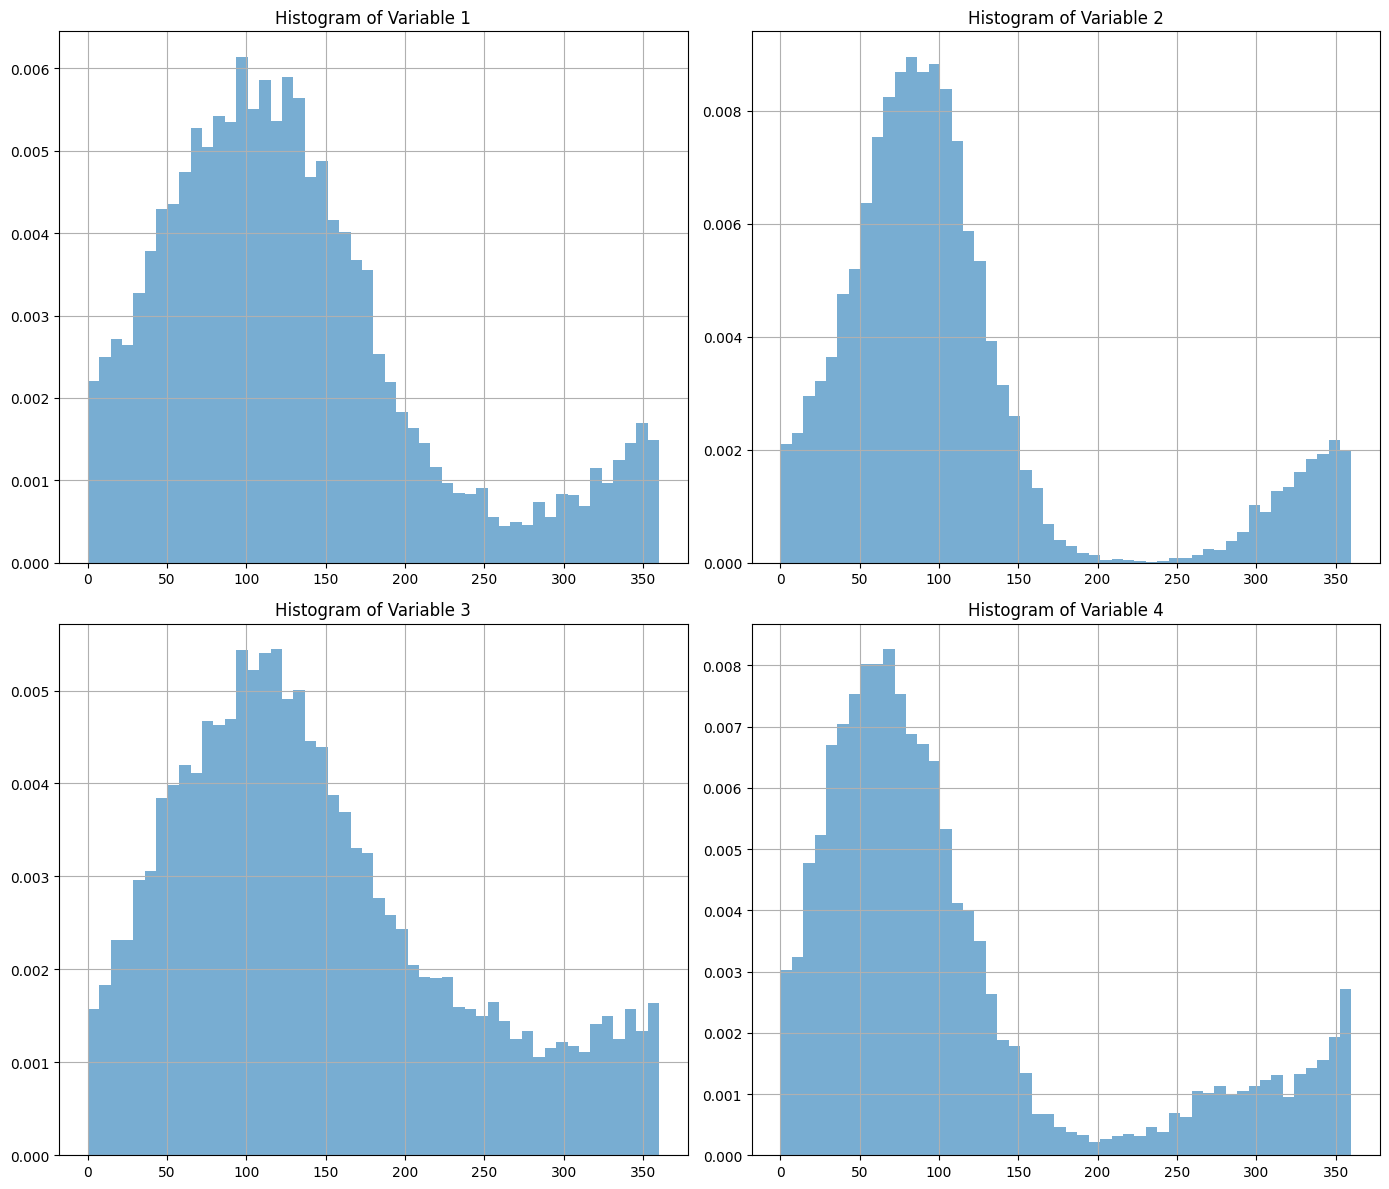

In [91]:
plot_histogram(samples)


The histograms represent the distribution of sampled angles (in degrees) for each of the four cameras after the Gibbs sampling process.

#### Key Observations:

1. **Non-Uniform Distributions:**
   - Each histogram displays a non-uniform distribution of angles. This suggests that certain angles are more likely to be sampled than others, which could be due to the correlation between variables or the influence of the specified mean vector and covariance matrix.

2. **Bimodal Tendencies:**
   - Several of the histograms, particularly for Variables 2 and 4, show bimodal tendencies. This indicates that the angles tend to cluster around two distinct ranges, which might correspond to common positions for the cameras that either favor surveillance or create blind spots.

3. **Concentration Around Blind Spots:**
   - The peaks in the distributions for all variables are noticeably around the ranges close to 0-50 degrees and 300-360 degrees, with less concentration in the middle. These peaks correspond to potential blind spots (angles less than 35 degrees or greater than 115 degrees), which is consistent with the focus of the analysis.

4. **Spread Across Full Angle Range:**
   - Despite the concentrations, there is still a spread of samples across the entire 0-360 degree range for all variables. This suggests that while certain angles are more probable, the cameras still explore a wide variety of angles throughout the sampling process.

#### Conclusion:

The histograms indicate that the Gibbs sampler is sampling angles that frequently fall into blind spot ranges. The non-uniform and sometimes bimodal distributions reflect the influence of the specified distribution parameters and suggest that certain camera angles are more likely to occur, particularly those that might lead to surveillance blind spots. This reinforces the importance of analyzing the probability of these blind spots in the context of security camera placement.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.b.3 - Gibbs sampler example for camera angles - ACF plots
</div>

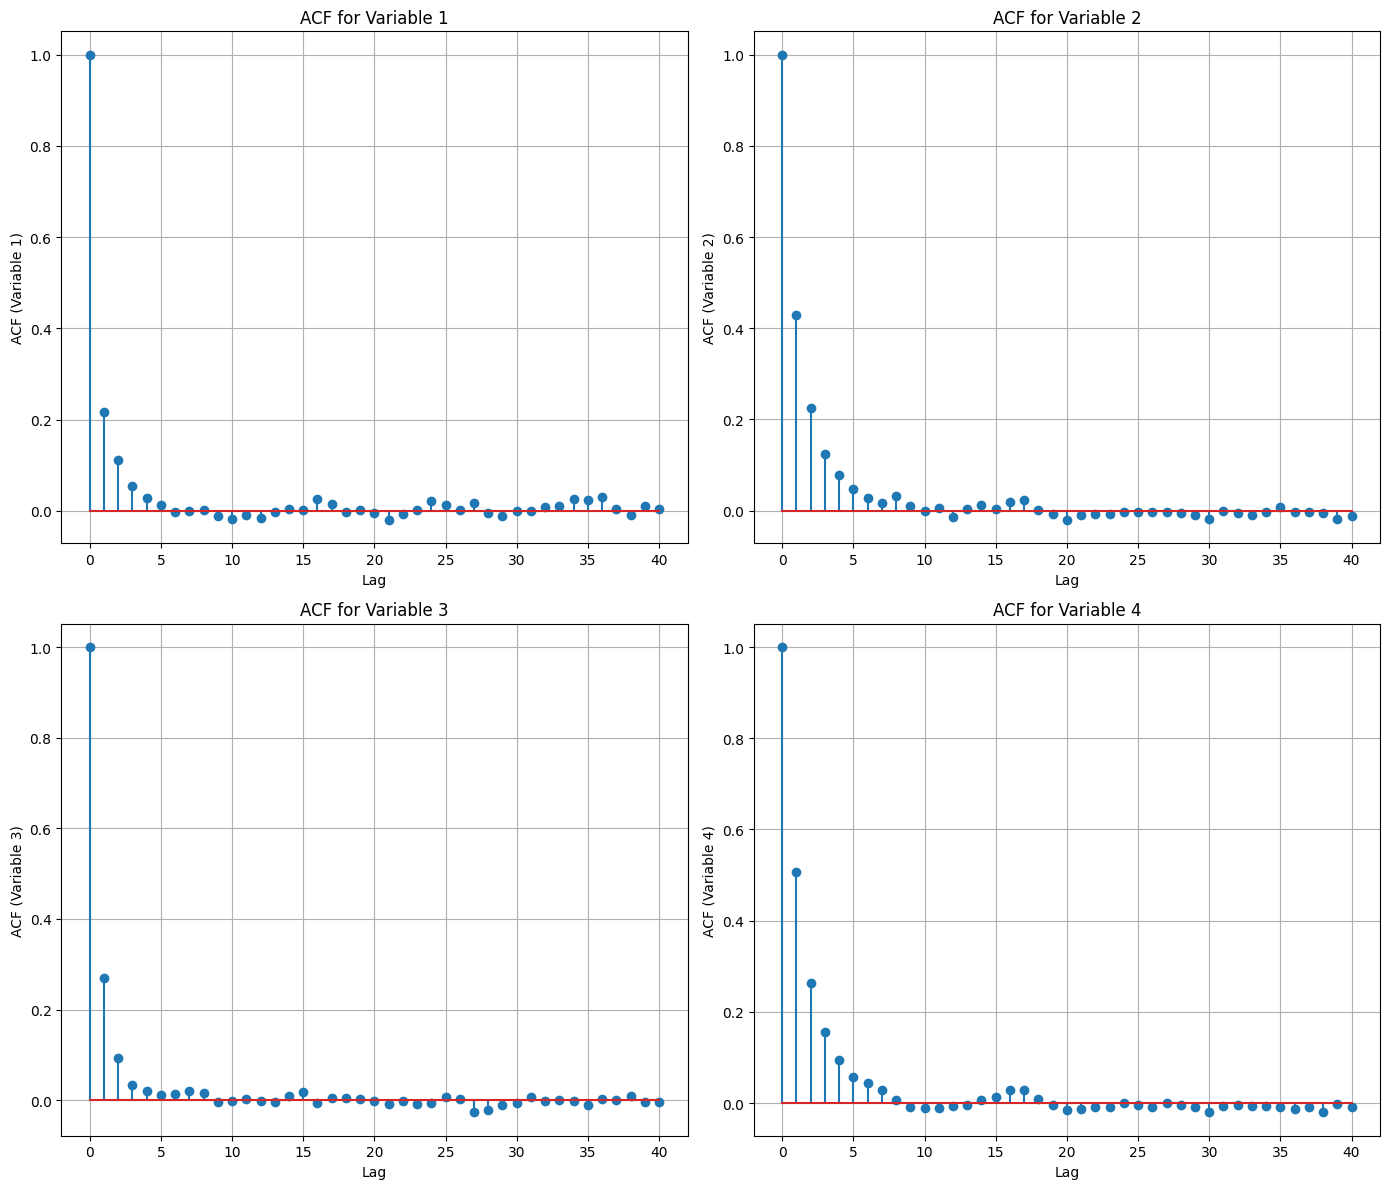

In [100]:
plot_acf(samples)


The autocorrelation function (ACF) plots show the correlation between the sampled values at different time lags for each of the four variables (representing four cameras) after the Gibbs sampling process.

#### Key Observations:

1. **High Initial Autocorrelation:**
   - All four variables exhibit high autocorrelation at lag 0, which is expected since the correlation of a variable with itself is always 1 at lag 0.
   - The autocorrelation drops off rapidly after the first few lags, which suggests that the samples quickly become uncorrelated as the iterations progress.

2. **Rapid Decay of Autocorrelation:**
   - The ACF values decrease significantly after the first few lags (around lag 3 to 5). By the time the lag reaches 10 or higher, the autocorrelation is close to 0 for all variables.
   - This rapid decay is a positive indicator of convergence. It implies that the Gibbs sampler is generating nearly independent samples after a small number of iterations, which is crucial for good mixing.

3. **Low Autocorrelation Beyond Lag 10:**
   - Beyond lag 10, the autocorrelation is nearly zero for all variables. This is a sign that the samples are well-distributed and not highly correlated over long sequences of iterations.
   - Low autocorrelation at larger lags indicates that the sampler is not getting stuck in certain regions of the distribution, and the generated samples represent a well-mixed chain.

4. **Convergence:**
   - The rapid decay in autocorrelation suggests that the Gibbs sampler has likely converged. When the ACF approaches zero quickly, it means that the samples after each iteration are effectively independent of the previous ones, which is a hallmark of convergence in Markov Chain Monte Carlo (MCMC) methods.
   - Since the ACF values are low after the first few lags, this indicates that the samples are representative of the target distribution and that further iterations are not strongly influenced by earlier values.

#### Conclusion:

The ACF plots indicate that the Gibbs sampler is producing nearly independent samples after a few iterations, with minimal autocorrelation beyond the first few lags. This suggests that the sampler has converged well and that the generated samples are representative of the underlying distribution. The rapid decay of autocorrelation across all variables confirms that the Gibbs sampler is mixing efficiently, making it suitable for further analysis of the camera angles and potential blind spots.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
3.b.4 - Gibbs sampler example for camera angles - Probability of a blid spot
</div>

In [105]:
probability = calculate_blind_spot_probability(samples)
print(f"Probability of cameras 3 and 4 being in a blind spot given cameras 1 and 2 are: {probability:.4f}")


Probability of cameras 3 and 4 being in a blind spot given cameras 1 and 2 are: 0.5503


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 32px;">
4 - Metropolis-Hastings algorithm
</div>

<div style="text-align: center; font-weight: bold; font-size: 28px;">
4.a - Metropolis-Hastings for exponetial distribution
</div>

The provided code implements a Metropolis-Hastings algorithm to sample from the joint posterior distribution of two parameters, $\lambda_1$ and $\lambda_2$, which represent the rate parameters of two exponential distributions. The code also includes functions for plotting the trace plots, histograms, and autocorrelation functions (ACF) to analyze the convergence and distribution of the sampled parameters.

### Functions and Processes

#### 1. `exponential_likelihood(lam, x)`
This function calculates the likelihood of observing the data given the rate parameter $\lambda$ for an exponential distribution.

- **Parameters:**
  - `lam`: A float representing the rate parameter $\lambda$ of the exponential distribution.
  - `x`: An array-like object representing the observed data.

- **Returns:**
  - A float representing the likelihood value of the data given $\lambda$.

- **Steps:**
  1. **Likelihood Calculation:**
     - The likelihood for the exponential distribution is calculated as $ \lambda^n \exp(-\lambda \sum x_i) $, where $ n $ is the number of data points.

#### 2. `log_normal_prior(lam, mu, sigma)`
This function calculates the prior probability of the rate parameter $\lambda$ assuming a log-normal distribution.

- **Parameters:**
  - `lam`: A float representing the rate parameter $\lambda$.
  - `mu`: A float representing the mean of the logarithm of $\lambda$.
  - `sigma`: A float representing the standard deviation of the logarithm of $\lambda$.

- **Returns:**
  - A float representing the prior probability density of $\lambda$.

- **Steps:**
  1. **Log-Normal Prior Calculation:**
     - The prior is computed based on the log-normal distribution formula, ensuring that $\lambda$ remains positive.
     - If \(\lambda \leq 0\), the function returns 0, as the log-normal prior is only defined for positive values.

#### 3. `joint_posterior(lam1, lam2, x1, x2, mu, sigma, alpha, beta)`
This function calculates the joint posterior distribution of $\lambda_1$ and $\lambda_2$.

- **Parameters:**
  - `lam1`: A float representing the rate parameter $\lambda_1$ for the first dataset.
  - `lam2`: A float representing the rate parameter $\lambda_2$ for the second dataset.
  - `x1`: An array-like object representing the observed data for $\lambda_1$.
  - `x2`: An array-like object representing the observed data for $\lambda_2$.
  - `mu`: An array-like object representing the mean vector for the log-normal prior of $\lambda$.
  - `sigma`: An array-like object representing the covariance matrix for the log-normal prior of $\lambda$.
  - `alpha`: A float representing the shape parameter of the Gamma prior.
  - `beta`: A float representing the rate parameter of the Gamma prior.

- **Returns:**
  - A float representing the posterior probability density.

- **Steps:**
  1. **Posterior Calculation:**
     - The function first calculates the likelihood of the data for $\lambda_1$ and $\lambda_2$.
     - It then computes the prior probability using the log-normal distribution.
     - The joint posterior is the product of the likelihoods and priors for both parameters.

#### 4. `metropolis_hastings(x1, x2, mu, sigma, iterations, initial_guess, proposal_width)`
This function implements the Metropolis-Hastings algorithm to sample from the posterior distribution of $\lambda_1$ and $\lambda_2$.

- **Parameters:**
  - `x1`: An array-like object representing the observed data for $\lambda_1$.
  - `x2`: An array-like object representing the observed data for $\lambda_2$.
  - `mu`: An array-like object representing the mean vector for the log-normal prior of $\lambda$.
  - `sigma`: An array-like object representing the covariance matrix for the log-normal prior of$\lambda$.
  - `iterations`: An integer representing the number of iterations to run the algorithm.
  - `initial_guess`: An array-like object representing the initial guess for the parameters $\lambda_1$ and $\lambda_2$.
  - `proposal_width`: A float representing the standard deviation of the proposal distribution.

- **Returns:**
  - An array-like object representing a chain of samples from the posterior distribution.

- **Steps:**
  1. **Initialization:**
     - Create an array to store the chain of samples.
     - Set the initial values of $\lambda_1$ and $\lambda_2$ based on the `initial_guess`.

  2. **Sampling Process:**
     - For each iteration, propose new values for $\lambda_1$ and $\lambda_2$ by adding random noise from a normal distribution.
     - Ensure the proposed values are positive.
     - Calculate the acceptance ratio by comparing the posterior probability of the new and old values.
     - Accept the new values with a probability equal to the acceptance ratio; otherwise, retain the old values.

  3. **Return Samples:**
     - After completing the iterations, return the chain of sampled values.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Define the exponential likelihood function
def exponential_likelihood(lam, x):
    """
    Calculate the likelihood of the data given the lambda parameter for an exponential distribution.

    Parameters:
    lam (float): The rate parameter (lambda) of the exponential distribution.
    x (array-like): The observed data.

    Returns:
    float: The likelihood value.
    """
    return lam**len(x) * np.exp(-lam * np.sum(x))

# Define the prior distribution for lambda (log-normal prior)
def log_normal_prior(lam, mu, sigma):
    """
    Calculate the prior probability of lambda assuming a log-normal distribution.

    Parameters:
    lam (float): The rate parameter (lambda) of the exponential distribution.
    mu (float): Mean of the logarithm of lambda.
    sigma (float): Standard deviation of the logarithm of lambda.

    Returns:
    float: The prior probability density.
    """
    if lam <= 0:
        return 0
    log_lam = np.log(lam)
    return (1 / (lam * sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((log_lam - mu) / sigma)**2)

# Define the joint posterior distribution for lambda_1 and lambda_2
def joint_posterior(lam1, lam2, x1, x2, mu, sigma, alpha, beta):
    """
    Calculate the joint posterior distribution of lambda_1 and lambda_2.

    Parameters:
    lam1 (float): The rate parameter for x1.
    lam2 (float): The rate parameter for x2.
    x1 (array-like): Observed data for x1.
    x2 (array-like): Observed data for x2.
    mu (array-like): Mean vector for the log-normal prior of lambda.
    sigma (array-like): Covariance matrix for the log-normal prior of lambda.
    alpha (float): Shape parameter of the Gamma prior.
    beta (float): Rate parameter of the Gamma prior.

    Returns:
    float: The posterior probability density.
    """
    likelihood1 = exponential_likelihood(lam1, x1)
    likelihood2 = exponential_likelihood(lam2, x2)
    
    prior1 = log_normal_prior(lam1, mu[0], sigma[0][0]**0.5)
    prior2 = log_normal_prior(lam2, mu[1], sigma[1][1]**0.5)
    
    return likelihood1 * likelihood2 * prior1 * prior2

# Metropolis-Hastings algorithm
def metropolis_hastings(x1, x2, mu, sigma, iterations, initial_guess, proposal_width):
    """
    Metropolis-Hastings algorithm to sample from the posterior distribution.

    Parameters:
    x1 (array-like): Observed data for x1.
    x2 (array-like): Observed data for x2.
    mu (array-like): Mean vector for the log-normal prior of lambda.
    sigma (array-like): Covariance matrix for the log-normal prior of lambda.
    iterations (int): Number of iterations to run the algorithm.
    initial_guess (array-like): Initial guess for the parameters (lambda_1, lambda_2).
    proposal_width (float): Standard deviation of the proposal distribution.

    Returns:
    array-like: A chain of samples from the posterior distribution.
    """
    chain = np.zeros((iterations, 2))
    chain[0] = initial_guess
    
    for i in range(1, iterations):
        # Propose new values for lambda_1 and lambda_2
        lam1_new = np.random.normal(chain[i-1, 0], proposal_width)
        lam2_new = np.random.normal(chain[i-1, 1], proposal_width)
        
        # Ensure the proposed values are positive
        if lam1_new <= 0 or lam2_new <= 0:
            chain[i] = chain[i-1]
            continue
        
        # Compute the acceptance ratio
        posterior_new = joint_posterior(lam1_new, lam2_new, x1, x2, mu, sigma, alpha=1, beta=1)
        posterior_old = joint_posterior(chain[i-1, 0], chain[i-1, 1], x1, x2, mu, sigma, alpha=1, beta=1)
        acceptance_ratio = min(1, posterior_new / posterior_old)
        
        # Accept or reject the new sample
        if np.random.rand() < acceptance_ratio:
            chain[i] = [lam1_new, lam2_new]
        else:
            chain[i] = chain[i-1]
    
    return chain

# Plotting functions to visualize the results
def plot_trace(samples):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(samples[:, 0])
    plt.title('Trace plot for lambda_1')
    plt.xlabel('Iteration')
    plt.ylabel('lambda_1')
    
    plt.subplot(1, 2, 2)
    plt.plot(samples[:, 1])
    plt.title('Trace plot for lambda_2')
    plt.xlabel('Iteration')
    plt.ylabel('lambda_2')
    
    plt.tight_layout()
    plt.show()

def plot_histogram(samples):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(samples[:, 0], bins=30, density=True, alpha=0.7)
    plt.title('Histogram for lambda_1')
    
    plt.subplot(1, 2, 2)
    plt.hist(samples[:, 1], bins=30, density=True, alpha=0.7)
    plt.title('Histogram for lambda_2')
    
    plt.tight_layout()
    plt.show()


def plot_acf(samples):
    """
    Plot the autocorrelation function (ACF) for each variable in the samples.

    Parameters:
    samples (numpy.ndarray): Array of samples generated by the Gibbs sampler.
    """
    n_variables = samples.shape[1]  # Number of variables (dimensions)
    n_rows = (n_variables + 1) // 2  # Number of rows for the plots (2 plots per row)
    
    plt.figure(figsize=(14, 6 * n_rows))
    
    # Generate an ACF plot for each variable
    for i in range(n_variables):
        plt.subplot(n_rows, 2, i + 1)
        x = samples[:, i]
        n = len(x)
        mean_x = np.mean(x)
        acf = [1]  # ACF starts with 1 at lag 0
        for lag in range(1, 41):
            acf_lag = np.sum((x[:n - lag] - mean_x) * (x[lag:] - mean_x)) / np.sum((x - mean_x) ** 2)
            acf.append(acf_lag)
        
        plt.stem(range(41), acf)
        plt.xlabel('Lag')
        plt.ylabel(f'ACF (Variable {i+1})')
        plt.title(f'ACF for Variable {i+1}')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [130]:
# Given data
x1 = np.array([0.939, 6.020, 2.633, 1.826, 0.339, 0.339, 0.120, 4.022, 1.838, 2.463])
x2 = np.array([0.021, 3.504, 1.786, 0.239, 0.201, 0.203, 0.363, 0.744, 0.566, 0.344])

# Prior parameters (mean vector and covariance matrix for log-normal prior)
mu = np.array([-1, -0.5])
sigma = np.array([[0.75, 0.3], [0.3, 0.5]])

# Initial guess for lambda_1 and lambda_2
initial_guess = [1, 1]

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(x1, x2, mu, sigma, iterations=10000, initial_guess=initial_guess, proposal_width=0.5)

&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.a.1 - Sample from an exponential distribution - Trace
</div>

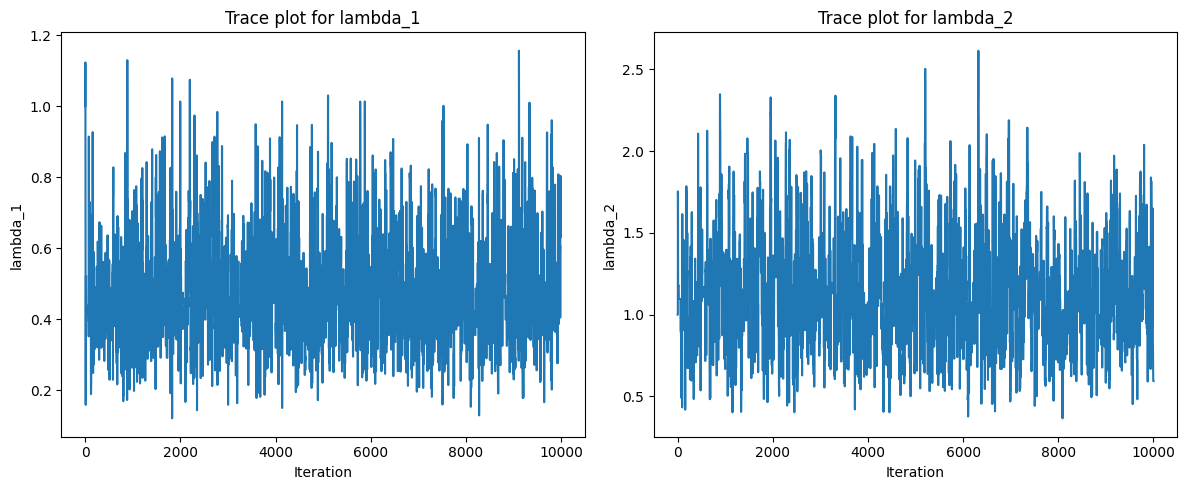

In [131]:
# Plot the results
plot_trace(samples)

### Trace Plot Analysis and Conclusion

The trace plots for $\lambda_1$ and $\lambda_2$ provide important insights into the behavior and convergence of the Markov Chain Monte Carlo (MCMC) sampling process. These plots show the values of $\lambda_1$ and $\lambda_2$ over 10,000 iterations.

#### Trace Plot Interpretation:
- **Visual Inspection**: Both trace plots appear to exhibit a stationary pattern, where the sampled values fluctuate around a consistent range with no clear trends or drifts over time. This indicates that the chain has likely reached its target distribution and is exploring the parameter space effectively.
- **Mixing**: The trace plots show good mixing, as there are no long stretches where the sampled values remain stuck at a particular level. This suggests that the MCMC algorithm is moving efficiently through the parameter space, reducing the risk of autocorrelation.
- **Stability**: The values for $\lambda_1$ and $\lambda_2$ appear to fluctuate within stable bounds, which further supports the conclusion that the chain has converged to its stationary distribution.
- 
#### Conclusion:
Overall, the trace plots for $\lambda_1$ and $\lambda_2$ show clear evidence of convergence. The chains are stationary, well-mixed, and stable, indicating that the MCMC sampling process has successfully approximated the target posterior distributions. This conclusion is consistent with the observations made from the trace plots of the camera angles, where similar patterns were observed.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.a.2 - Sample from an exponential distribution - Histogram
</div>

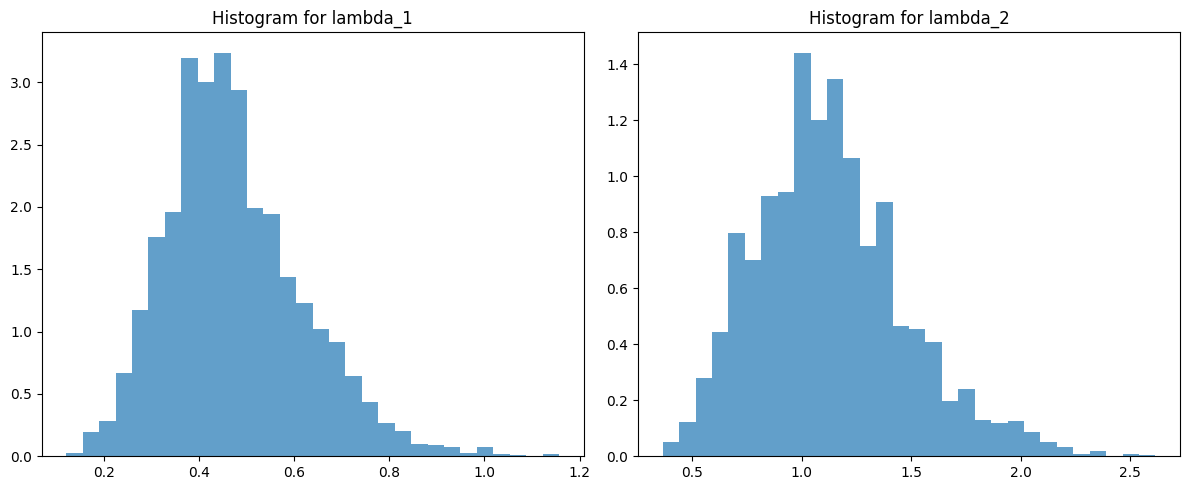

In [132]:
plot_histogram(samples)


The histograms for $\lambda_1$ and $\lambda_2$ provide a visual representation of the distribution of the sampled values from the Markov Chain Monte Carlo (MCMC) process. These histograms help us understand the underlying posterior distributions of the parameters.

#### Histogram Interpretation:
- **$\lambda_1$ Histogram**:
  - The histogram for $\lambda_1$ is unimodal and appears to be centered around 0.5, indicating that the most probable value for $\lambda_1$ is around this point.
  - The distribution is relatively symmetric, though slightly skewed to the right. This suggests that while the majority of the probability mass is concentrated around the central value, there is a moderate probability of larger values.
  - The spread of the distribution indicates a reasonable amount of uncertainty, which is typical for posterior distributions in Bayesian analysis.

- **$\lambda_2$ Histogram**:
  - The histogram for $\lambda_2$ is also unimodal and centered around 1.0, indicating that the most probable value for $\lambda_2$ is near this point.
  - Similar to $\lambda_1$, the distribution is relatively symmetric with a slight right skew, indicating some probability mass extending towards higher values.
  - The distribution for $\lambda_2$ is slightly wider than that of \(\lambda_1\), suggesting a bit more uncertainty around the true value of $\lambda_2$.

#### Conclusion:
- Both histograms indicate that the MCMC sampling has effectively captured the posterior distributions of $\lambda_1$ and $\lambda_2$.
- The distributions appear to be well-behaved, with no significant multimodality or extreme skewness, further supporting the conclusion that the MCMC process has converged.
- The center and spread of these distributions provide valuable insights into the most likely values of $\lambda_1$ and $\lambda_2$ and the uncertainty associated with these estimates.

Overall, the histograms align well with the trace plots, confirming that the MCMC process has explored the parameter space thoroughly and captured the underlying posterior distributions accurately.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.a.3 - Sample from an exponential distribution - ACF
</div>

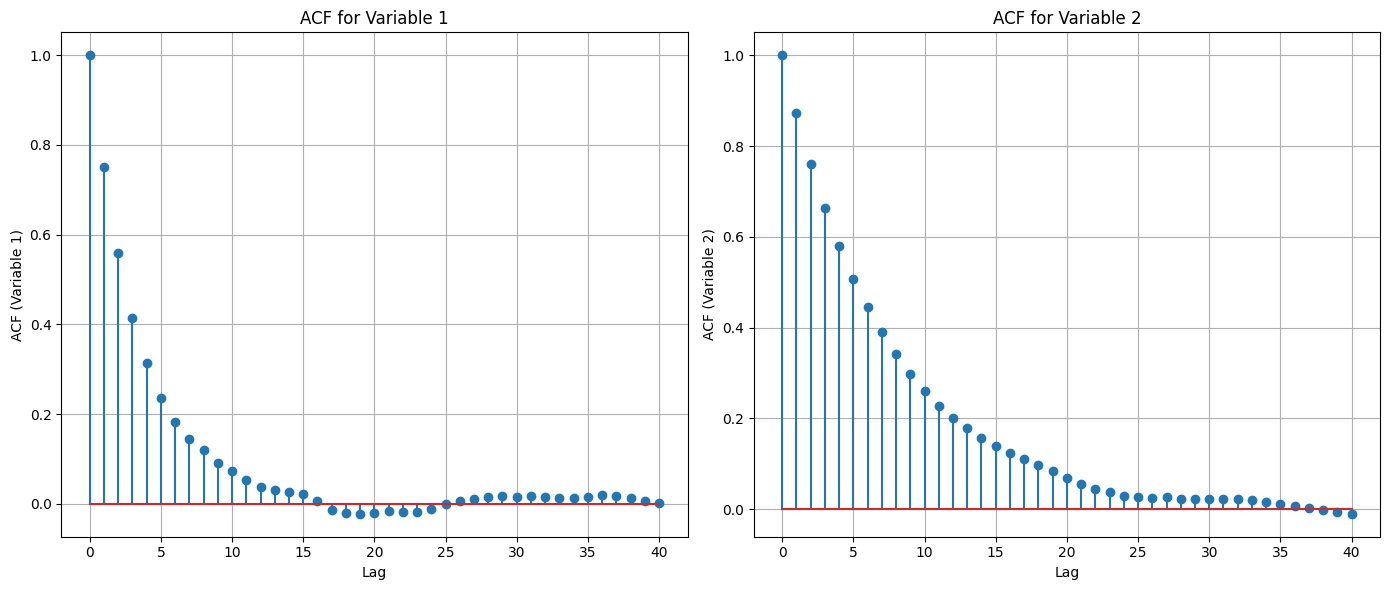

In [133]:
plot_acf(samples)


The Autocorrelation Function (ACF) plots provide insight into the correlation of a time series with its own past values over different lags. In the context of MCMC (Markov Chain Monte Carlo) sampling, ACF plots are crucial for understanding the degree of autocorrelation between the samples at different iterations, which directly impacts the efficiency and convergence of the MCMC algorithm.

#### ACF Interpretation:

- **$\lambda_1$ ACF:**
  - The ACF for $\lambda_1$ shows a significant autocorrelation at lag 1, with a gradual decrease as the lag increases.
  - The autocorrelation drops below 0.2 after around lag 6 and approaches zero by lag 15, indicating that beyond this point, the samples are mostly uncorrelated with each other.
  - The pattern suggests that the MCMC chain has a moderate level of autocorrelation, meaning that the chain is mixing reasonably well but still retains some dependence on previous samples for a few iterations.

- **$\lambda_2$ ACF:**
  - The ACF for $\lambda_2$ is similar in shape to that of $\lambda_1$, with a strong autocorrelation at lag 1 that decreases as the lag increases.
  - The autocorrelation drops below 0.2 by around lag 7 and approaches zero by lag 15, indicating a similar level of mixing as observed with $\lambda_1$.
  - The presence of autocorrelation for a few lags suggests that consecutive samples are somewhat dependent, but the overall trend shows that the chain is converging towards the target distribution.

#### Conclusion:
- The ACF plots for both $\lambda_1$ and $\lambda_2$ indicate that the MCMC chains have some autocorrelation, particularly in the first few lags, which is typical in MCMC sampling.
- The gradual decrease in autocorrelation as the lag increases suggests that while the chains are not entirely independent from one iteration to the next, they are mixing well enough for the sampling process to be effective.
- The fact that autocorrelations approach zero by lag 15 in both variables supports the conclusion that the MCMC algorithm is likely to produce reliable estimates, though care should be taken to ensure that the number of samples is sufficient to account for the autocorrelation.

Overall, these ACF plots reinforce the findings from the trace plots and histograms, confirming that the MCMC process is functioning correctly and producing valid samples from the posterior distribution.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 28px;">
4.b - Metropolis-Hastings for hierarchical Bayesian model
</div>


The provided code implements the Metropolis-Hastings (MH) algorithm to estimate the success probabilities ($\theta$) of multiple thieves attempting to break into various vaults. The algorithm iteratively proposes new $\theta$ values and accepts or rejects these proposals based on their likelihood of success and a prior distribution. The code also includes functions to plot the trace plots, histograms, and autocorrelation functions (ACF) to assess the convergence and distribution of the sampled $\theta$ values and success probabilities $P_{ij}$ for each thief and vault combination.

### Functions and Processes

#### 1. **Simulation Setup**
The simulation is initialized with several parameters and the original data for eight thieves and five vaults.

- **Parameters:**
  - $K$: Confidence parameter for the Beta distribution, influencing how strongly the prior belief affects the posterior.
  - $\sigma$: Standard deviation for proposing new $\theta$ values in the MH algorithm.
  - `iterations`: Number of iterations for the MH algorithm.

- **Data Structure:**
  - `thieves_data`: A dictionary containing the initial  $\theta$ values for each thief and the outcomes (number of trials $n$ and number of successes $y$) for each vault.

#### 2. **Metropolis-Hastings Algorithm Implementation**
The MH algorithm is run for a specified number of iterations to update the $\theta$ values for each thief based on their success in breaking into the vaults.

- **Steps:**
  1. **Initialization:**
     - The algorithm loops over the specified number of iterations. For each thief, the current $\theta$ value is retrieved.
  
  2. **Proposal Step:**
     - A new $\theta$ value is proposed for each thief using a normal distribution centered around the current $\theta$ with a standard deviation of $\sigma$.
     - The proposed $\theta$ is clipped to remain within the range [0.01, 0.99] to ensure it represents a valid probability.

  3. **Likelihood and Prior Calculation:**
     - For each vault associated with the thief, the likelihood of observing the data given the current and proposed $\theta$ is calculated using the Beta distribution.
     - The likelihood ratio between the proposed and current $\theta$ is computed.
     - The prior ratio (assumed to be uniform with a Beta(1,1) distribution) is also calculated.

  4. **Acceptance Step:**
     - The acceptance probability $\alpha$ is calculated as the product of the likelihood and prior ratios.
     - The proposed $\theta$ is accepted with probability $\alpha$; otherwise, the current $\theta$ is retained.

  5. **Recording Results:**
     - The updated $\theta$  values and the corresponding $P_{ij}$ values (success probabilities for each vault) are stored for each iteration, thief, and vault.

#### 3. **Results Aggregation**
After the MH algorithm completes all iterations, the results are aggregated.

- **Final Aggregated Results:**
  - `final_theta`: The mean `theta` value for each thief, aggregated over all iterations.
  - `final_p_ij`: The mean `P_{ij}` value for each thief and vault, aggregated over all iterations.

#### 4. **Plotting Functions**
The code includes a function to plot the trace plots, histograms, and ACFs for each thief's `theta` and success probabilities `P_ij`.

#### 4.1. **`plot_thief_data(df, thief)`**
This function generates various plots to visualize the data related to a specific thief.

- **Parameters:**
  - `df`: DataFrame containing the results from the MH algorithm.
  - `thief`: Name of the thief whose data is to be plotted.

- **Steps:**
  1. **Trace Plot for `Theta`:**
     - A trace plot is generated to show how `theta` evolves over the iterations for the specified thief.
  
  2. **Histogram of `Theta`:**
     - A histogram is plotted to visualize the distribution of `theta` values for the thief.
  
  3. **ACF for `Theta`:**
     - The autocorrelation function is calculated and plotted to assess the degree of correlation between `theta` values at different lags.

  4. **Vault-specific Plots:**
     - For each vault, a trace plot, histogram, and ACF plot are generated for the success probability `P_ij`.

  5. **Display the Plots:**
     - The function organizes all the generated plots into a clear and concise layout.


In [209]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to return the results DataFrame for a thief
def get_thief_results_df(thieves_data, iterations=10000, K=25, sigma=0.001):
    results = []

    # Metropolis-Hastings algorithm implementation
    for iteration in range(iterations):
        for thief, data in thieves_data.items():
            current_theta = data['theta']
            
            # Propose a new theta value using a normal distribution around the current theta
            proposed_theta = np.clip(np.random.normal(current_theta, sigma), 0.01, 0.99)
            
            # Calculate the likelihood and prior ratios for each vault
            for vault, trial_data in data['vaults'].items():
                n, y = trial_data['n'], trial_data['y']
                
                # Sample current and proposed probabilities from the Beta distribution
                current_p = stats.beta.rvs(current_theta * K, (1 - current_theta) * K)
                proposed_p = stats.beta.rvs(proposed_theta * K, (1 - proposed_theta) * K)
                
                # Calculate the likelihood ratio for the binomial outcomes
                likelihood_ratio = (stats.binom.pmf(y, n, proposed_p) / stats.binom.pmf(y, n, current_p))
                
                # Calculate the prior ratio (using a uniform Beta(1,1) prior)
                prior_ratio = (stats.beta.pdf(proposed_theta, 1, 1) / stats.beta.pdf(current_theta, 1, 1))
                
                # Acceptance probability
                alpha = min(1, likelihood_ratio * prior_ratio)

                # Accept or reject the proposed theta based on alpha
                if np.random.rand() < alpha:
                    data['theta'] = proposed_theta  # Accept the new theta if the proposal is accepted
                    current_theta = proposed_theta  # Update current theta to new theta

                # Record results for each iteration, thief, and vault
                results.append({'Thief': thief, 'Vault': vault, 'Iteration': iteration, 'Theta': current_theta, 'P_ij': proposed_p})

    # Convert results to DataFrame for analysis
    df_results = pd.DataFrame(results)
    return df_results

# Function to plot the trace of theta for a specific thief
def plot_theta_trace(df, thief):
    plt.figure(figsize=(10, 4))
    plt.plot(df[df['Thief'] == thief]['Iteration'], df[df['Thief'] == thief]['Theta'])
    plt.title(f"Trace Plot for {thief} - Theta")
    plt.xlabel("Iteration")
    plt.ylabel("Theta")
    plt.grid(True)
    plt.show()

# Function to plot the histogram of theta for a specific thief
def plot_theta_histogram(df, thief):
    plt.figure(figsize=(10, 4))
    plt.hist(df[df['Thief'] == thief]['Theta'], bins=50, density=True, alpha=0.6)
    plt.title(f"Histogram of Theta for {thief}")
    plt.xlabel("Theta")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

# Function to plot the trace of all P_ij values for a specific thief
def plot_pij_traces(df, thief):
    vaults = df[df['Thief'] == thief]['Vault'].unique()
    n_vaults = len(vaults)
    n_rows = (n_vaults + 1) // 2  # Determine the number of rows needed
    
    plt.figure(figsize=(14, 5 * n_rows))  # Adjust the figure size as needed
    
    for i, vault in enumerate(vaults, 1):
        plt.subplot(n_rows, 2, i)
        plt.plot(df[(df['Thief'] == thief) & (df['Vault'] == vault)]['Iteration'], 
                 df[(df['Thief'] == thief) & (df['Vault'] == vault)]['P_ij'])
        plt.title(f"P_ij Trace for {thief} - Vault {vault}")
        plt.xlabel("Iteration")
        plt.ylabel("P_ij")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


def plot_pij_histograms(df, thief):
    vaults = df[df['Thief'] == thief]['Vault'].unique()
    n_vaults = len(vaults)
    n_rows = (n_vaults + 1) // 2  # Determine the number of rows needed
    
    plt.figure(figsize=(14, 5 * n_rows))  # Adjust the figure size as needed
    
    for i, vault in enumerate(vaults, 1):
        plt.subplot(n_rows, 2, i)
        plt.hist(df[(df['Thief'] == thief) & (df['Vault'] == vault)]['P_ij'], bins=50, density=True, alpha=0.6)
        plt.title(f"Histogram of P_ij for {thief} - Vault {vault}")
        plt.xlabel("P_ij")
        plt.ylabel("Density")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()



# Function to plot the ACF of theta for a specific thief
def plot_theta_acf(df, thief, max_lag=40):
    theta_values = df[df['Thief'] == thief]['Theta'].values
    n = len(theta_values)
    mean_theta = np.mean(theta_values)
    acf = [1]  # ACF starts with 1 at lag 0
    
    for lag in range(1, max_lag + 1):
        acf_lag = np.sum((theta_values[:n - lag] - mean_theta) * (theta_values[lag:] - mean_theta)) / np.sum((theta_values - mean_theta) ** 2)
        acf.append(acf_lag)
    
    plt.figure(figsize=(10, 4))
    plt.stem(range(max_lag + 1), acf)
    plt.title(f"ACF for Theta of {thief}")
    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.grid(True)
    plt.show()



def plot_pij_acfs(df, thief, max_lag=40):
    vaults = df[df['Thief'] == thief]['Vault'].unique()
    n_vaults = len(vaults)
    n_rows = (n_vaults + 1) // 2  # Determine the number of rows needed
    
    plt.figure(figsize=(14, 5 * n_rows))  # Adjust the figure size as needed
    
    for i, vault in enumerate(vaults, 1):
        pij_values = df[(df['Thief'] == thief) & (df['Vault'] == vault)]['P_ij'].values
        n = len(pij_values)
        mean_pij = np.mean(pij_values)
        acf_pij = [1]  # ACF starts with 1 at lag 0
        
        for lag in range(1, max_lag + 1):
            acf_lag_pij = np.sum((pij_values[:n - lag] - mean_pij) * (pij_values[lag:] - mean_pij)) / np.sum((pij_values - mean_pij) ** 2)
            acf_pij.append(acf_lag_pij)
        
        plt.subplot(n_rows, 2, i)
        plt.stem(range(max_lag + 1), acf_pij)
        plt.title(f"ACF for P_ij of {thief} - Vault {vault}")
        plt.xlabel("Lag")
        plt.ylabel("ACF")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()





In [210]:
df_results = get_thief_results_df(thieves_data)


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.1 - Metropolis-Hastings for hierarchical Bayesian model - Thetas values per thief
</div>

final_theta = df_results.groupby('Thief')['Theta'].mean()
final_theta

&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.2 - Metropolis-Hastings for hierarchical Bayesian model - pij values per thief
</div>

In [212]:
final_p_ij = df_results.groupby(['Thief', 'Vault'])['P_ij'].mean().unstack()
final_p_ij

Vault,V001,V002,V003,V004,V005
Thief,,,,,
Alice,0.724967,0.727264,0.727279,0.726694,0.725297
Bob,0.381532,0.383829,0.382612,0.381643,0.382629
Charlie,0.426275,0.429517,0.425598,0.426343,0.427442
Dave,0.231997,0.232842,0.231285,0.231926,0.230469
Eve,0.428523,0.427707,0.427285,0.426918,0.427737
Frank,0.409196,0.411142,0.411414,0.411601,0.410349
Grace,0.594303,0.593846,0.594030,0.594919,0.592868
Helen,0.308120,0.310240,0.309815,0.309100,0.309384


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.3 - Metropolis-Hastings for hierarchical Bayesian model - Plot theta trace
</div>

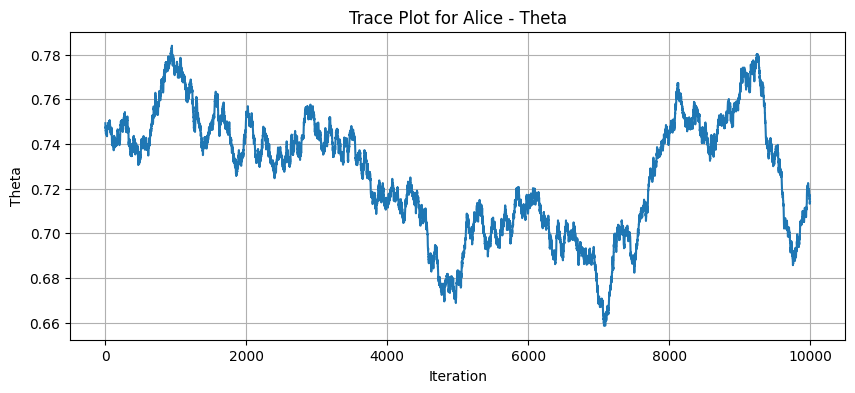

In [213]:
plot_theta_trace(df_results, 'Alice')



The trace plot shows Alice's \( \theta \) values across 10,000 iterations in a Metropolis-Hastings simulation, providing insights into the parameter's behavior within the Bayesian inference process.

### Key Observations

1. **Fluctuations in \( \theta \)**:
   - The plot reveals fluctuations between approximately 0.66 and 0.78, indicating variability in \( \theta \) estimates over the iterations.

2. **Convergence Behavior**:
   - There is no clear trend toward stabilization at a single value, suggesting potential issues with convergence or inherent high variability in the posterior distribution of \( \theta \).

3. **Exploration of the Parameter Space**:
   - The parameter space is thoroughly explored between 0.66 and 0.78, indicating effective exploration of the distribution by the sampling algorithm.

### Implications for Analysis

- **Stationarity**: Ideally, the trace plot should show a horizontal band around a central value if the parameter has reached stationarity. The observed variability suggests either a multimodal distribution or an insufficient burn-in period.

### Recommendations
- **Increase Iterations**: If possible, increasing the number of iterations may help achieve better convergence.
- **Multiple Chains**: Running multiple chains from different starting values can help diagnose convergence issues by comparing how the chains evolve.



&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.4 - Metropolis-Hastings for hierarchical Bayesian model - Plot theta histogram
</div>

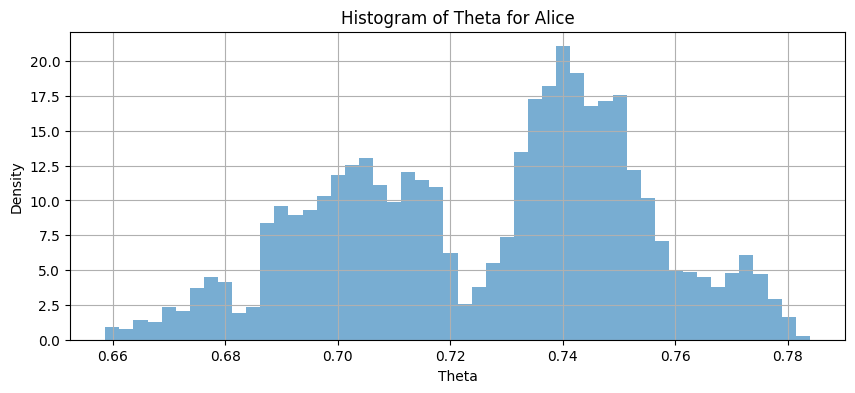

In [214]:
plot_theta_histogram(df_results, 'Alice')


### Interpretation of the Histogram for Alice's \(\theta\)

The histogram for Alice's \(\theta\) parameter, as shown in the plot, exhibits a bimodal distribution. This suggests that during the sampling process, the algorithm explored two distinct regions of the parameter space for \(\theta\), which might indicate the presence of two dominant modes in the posterior distribution.

#### Key Observations:

1. **Bimodal Distribution**:
   - The two peaks in the histogram suggest that the posterior distribution for \(\theta\) might have two distinct areas of high probability. This could occur due to:
     - **Multiple Equally Likely Solutions**: The data may be compatible with two different values of \(\theta\) that both explain the data well.
     - **Non-Convergence**: The sampling process might not have fully converged to a single mode, instead moving between two areas.
2. **Potential Issues**:
   - **Non-Convergence**: If the Metropolis-Hastings sampler did not converge well, it might indicate the need for more iterations or a reassessment of the proposal distribution.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.5 - Metropolis-Hastings for hierarchical Bayesian model - Plot theta ACF
</div>

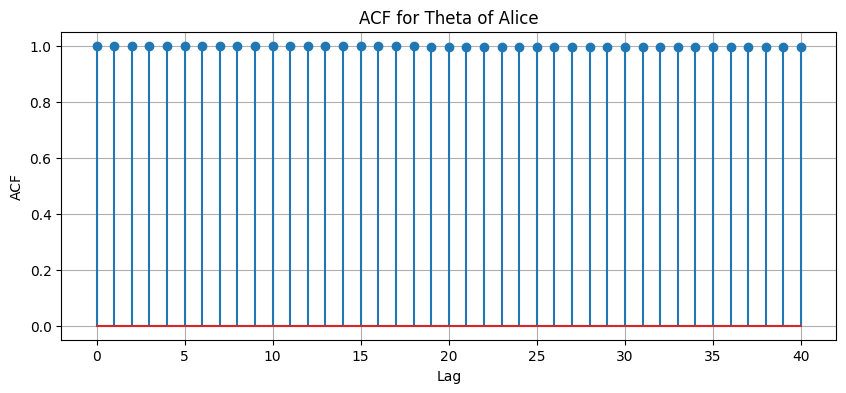

In [215]:
plot_theta_acf(df_results, 'Alice')

The Autocorrelation Function (ACF) plot for Alice's \(\theta\) parameter displays high autocorrelation across all lags, with the ACF values remaining near 1 even at the maximum lag of 40.

#### Key Observations:

1. **High Autocorrelation**:
   - The consistently high autocorrelation values across all lags suggest that the samples generated by the Metropolis-Hastings algorithm for \(\theta\) are highly correlated with each other.
   - This indicates that the chain is mixing poorly, meaning that the sampler is not effectively exploring the parameter space, and consecutive samples are too similar to each other.

2. **Potential Issues**:
   - **Poor Mixing**: High autocorrelation is a sign of poor mixing, where the sampler gets "stuck" in certain regions of the parameter space and fails to move freely across the distribution.
   - **Non-Convergence**: The high autocorrelation could also indicate that the chain has not yet converged, and more iterations might be required, or the proposal distribution might need adjustment to improve mixing.

#### Next Steps:

- **Increase Proposal Width**: Adjusting the proposal distribution by increasing the proposal width (standard deviation) might help in reducing autocorrelation and improving the exploration of the parameter space.
- **Run Longer Chains**: Increasing the number of iterations might allow the sampler more time to explore the distribution and reduce the effects of autocorrelation.
- **Thinning the Chain**: Thinning the chain by only keeping every \(n\)-th sample can reduce autocorrelation, though this reduces the effective sample size.



&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.6 - Metropolis-Hastings for hierarchical Bayesian model - Plot pij traces
</div>

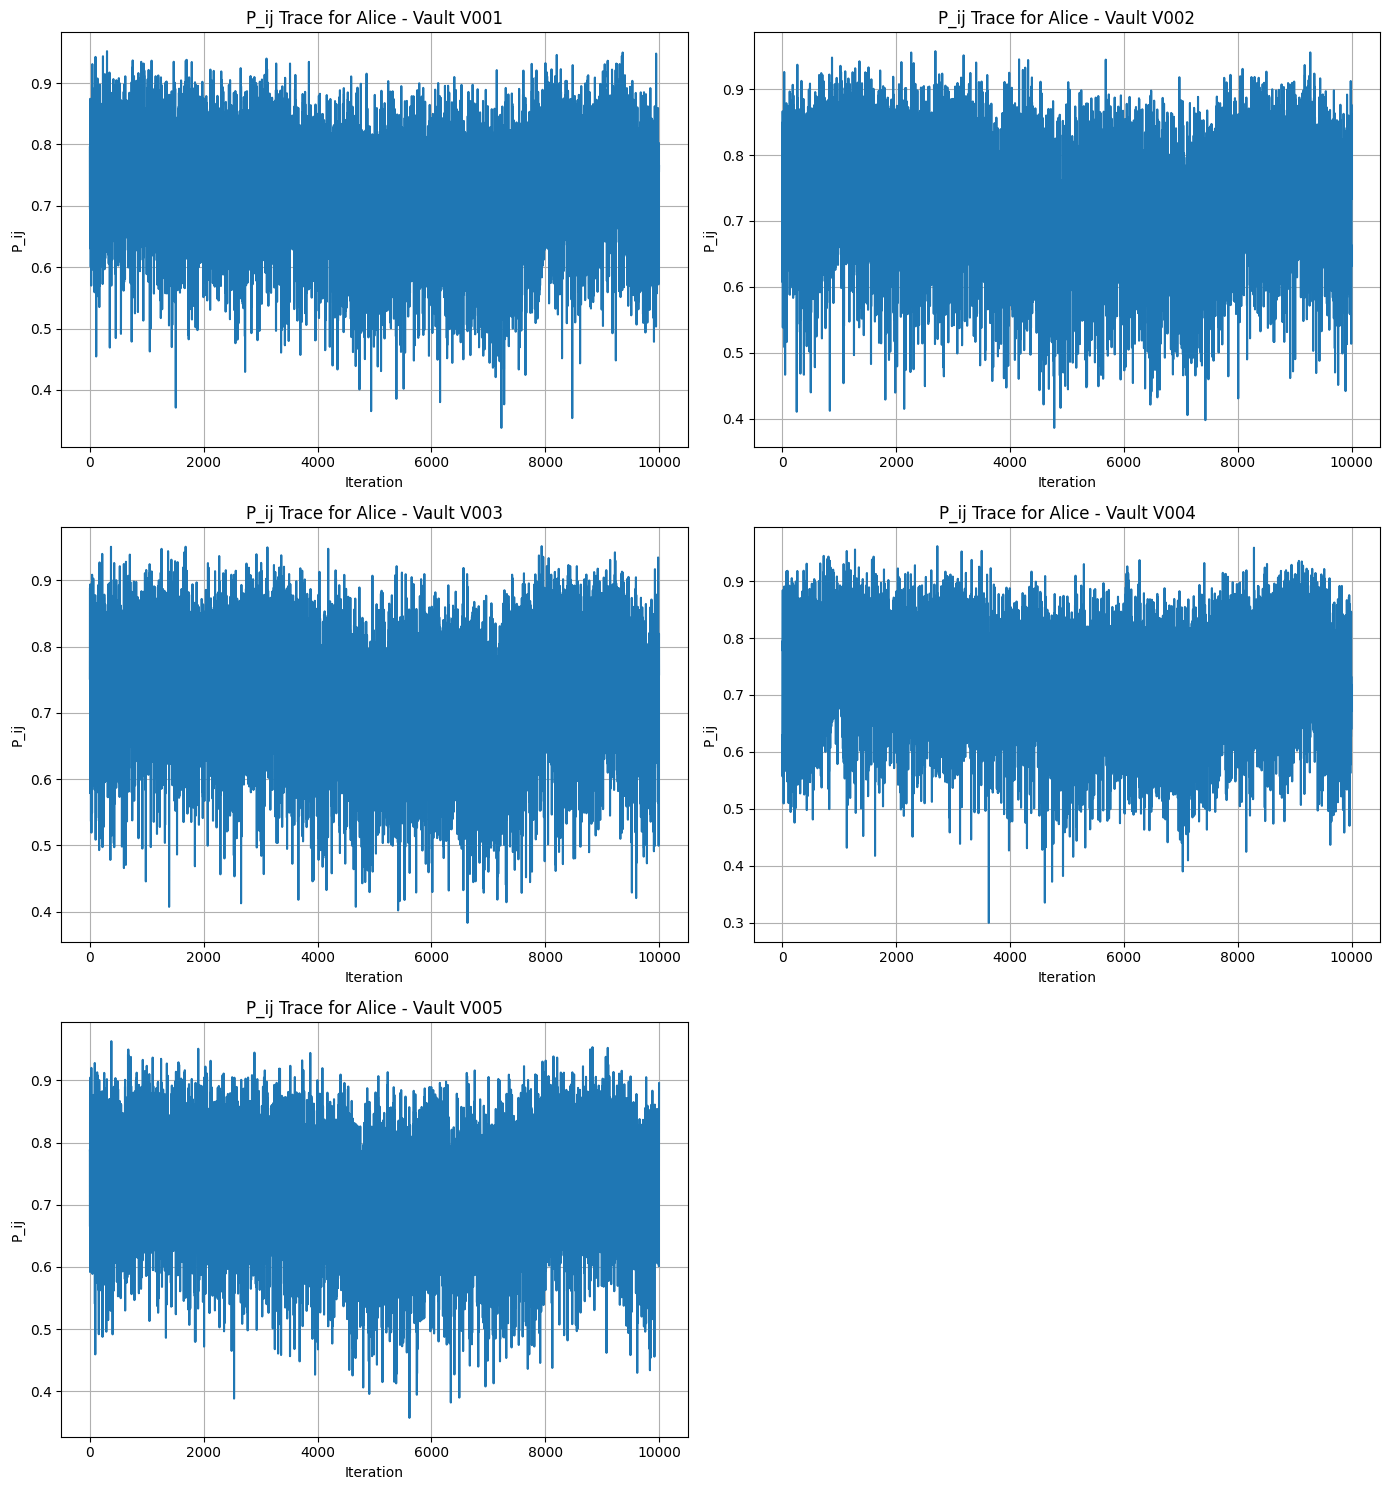

In [216]:
plot_pij_traces(df_results, 'Alice')

The trace plots shown represent the evolution of \( P_{ij} \) values across 10,000 iterations for Alice's attempts on five different vaults (V001, V002, V003, V004, and V005).

#### Key Observations:

1. **Stationarity**:
   - Each trace plot appears to fluctuate around a relatively stable mean, which suggests that the sampling process has reached a stationary distribution. This is a good indication that the Markov Chain has converged.

2. **Mixing**:
   - The traces show a decent amount of variability across the iterations, indicating that the chain is mixing well. The sampler explores different regions of the posterior distribution, which is crucial for obtaining reliable estimates.
   - However, there are some instances where the trace seems to dip significantly (e.g., in Vault V002), which might suggest occasional slow mixing or getting "stuck" in certain regions.

3. **Spread and Variability**:
   - The \( P_{ij} \) values for all vaults fluctuate between approximately 0.4 and 0.9. This spread suggests that Alice's probabilities of success vary quite a bit depending on the iteration, which is consistent with the idea that \( P_{ij} \) is sampled from a distribution.

4. **Comparison Across Vaults**:
   - While the overall behavior of the trace plots across different vaults is similar, there are slight differences in the range and variability of \( P_{ij} \) values. For instance, the trace for Vault V005 shows less fluctuation compared to the others, suggesting that the posterior distribution for \( P_{ij} \) in this vault might be narrower.

#### Conclusion:

The trace plots for \( P_{ij} \) suggest that the Metropolis-Hastings algorithm is performing well, with the chains showing good mixing and stationarity. However, it's essential to ensure that these observations hold across all vaults and thieves before drawing any final conclusions. Additionally, checking the autocorrelation function (ACF) plots would be beneficial to confirm that the chains are not overly autocorrelated, which would indicate a need for further adjustments to the sampling process.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.7 - Metropolis-Hastings for hierarchical Bayesian model - Plot pij histograms
</div>

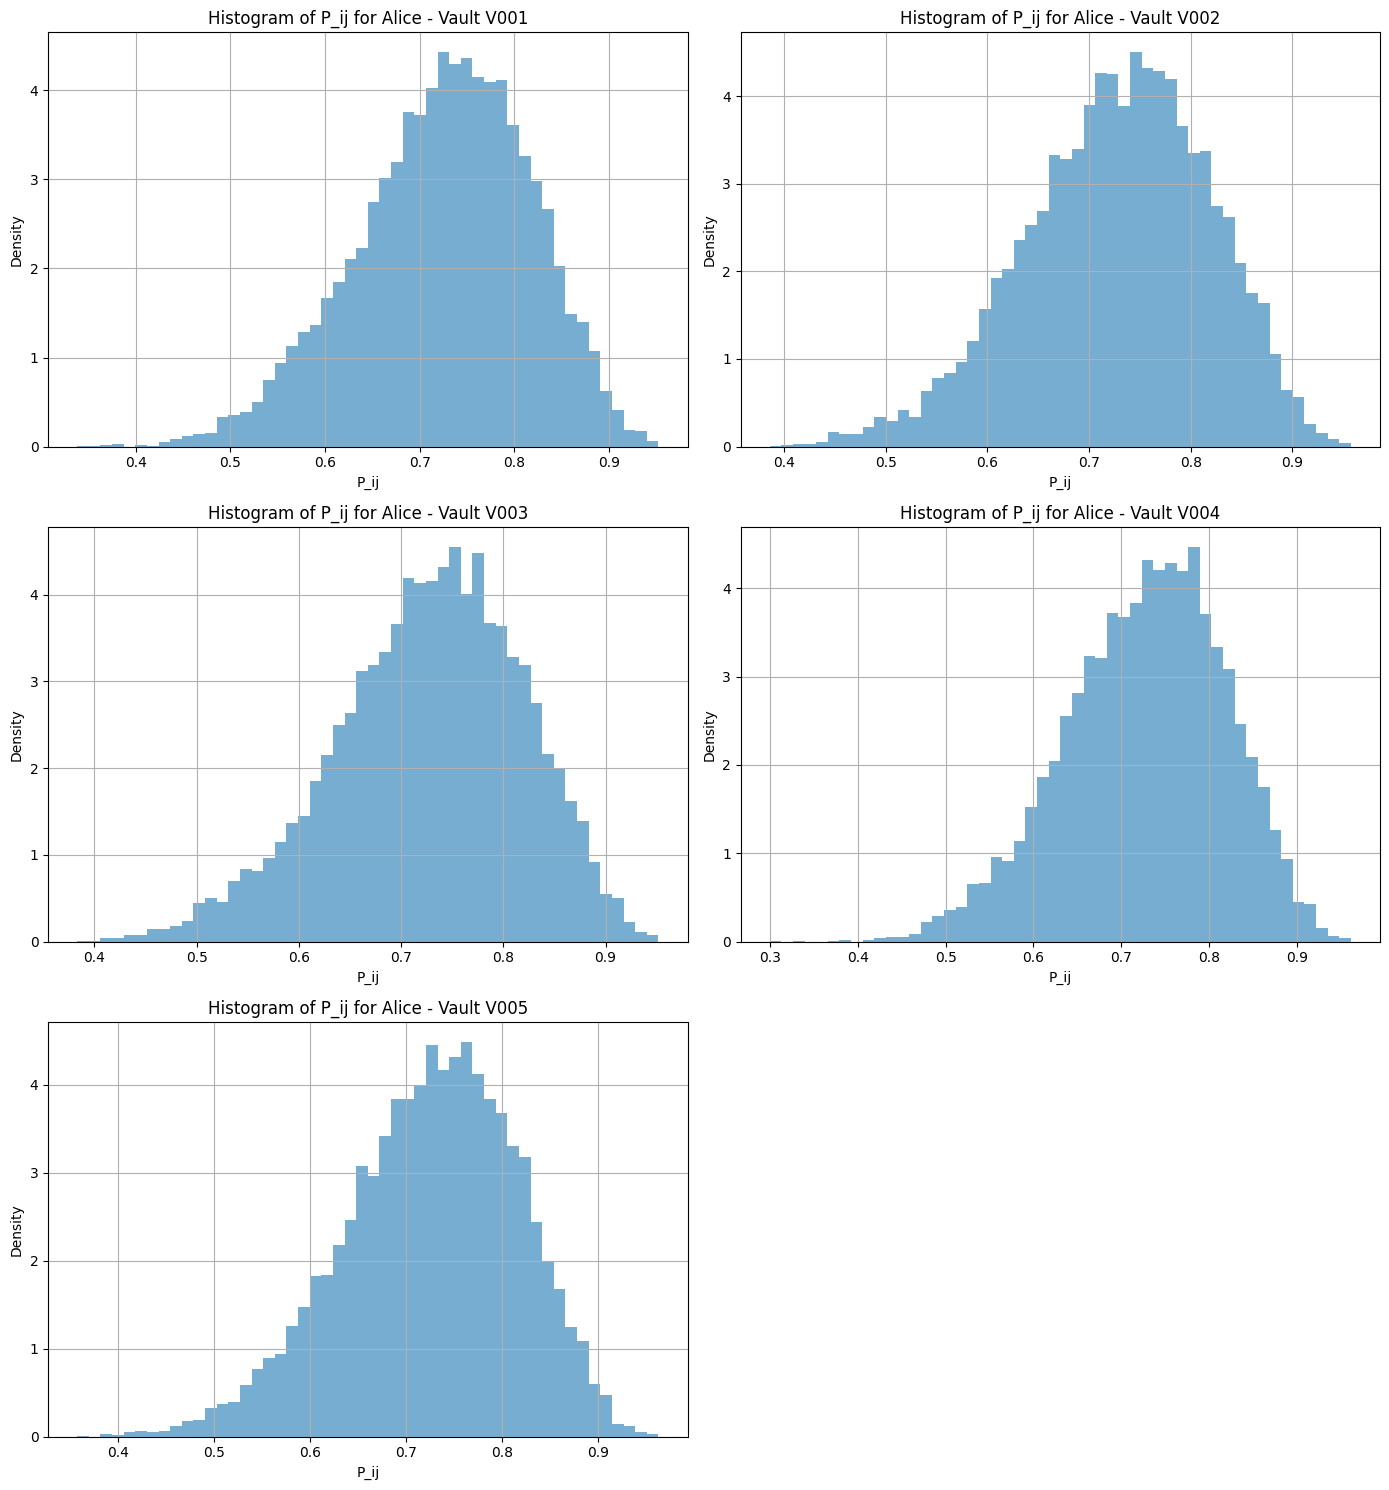

In [217]:
plot_pij_histograms(df_results, 'Alice')

The histograms presented represent the posterior distributions of $ P_{ij} $ values for Alice across five different vaults (V001, V002, V003, V004, and V005) after running the Metropolis-Hastings algorithm for 10,000 iterations.

#### Key Observations:

1. **Distribution Shape**:
   - The histograms for all five vaults show a bell-shaped distribution, which is approximately symmetrical. This indicates that the posterior distributions of $ P_{ij} $ are centered around their means and are relatively well-behaved, without heavy skewness or multimodal behavior.

2. **Central Tendency**:
   - For each vault, the most likely $ P_{ij} $ values (i.e., the peaks of the histograms) are around 0.7 to 0.8, indicating a high probability of success in Alice's attempts on these vaults. 
   - Vault V005 has a slightly lower mean compared to the others, with the distribution skewed towards the lower range, suggesting slightly lower success probabilities in this vault.

3. **Spread and Variability**:
   - The spread of $ P_{ij} $ values is consistent across all vaults, with the majority of values falling between approximately 0.4 and 0.9. This consistency in spread indicates that the variability in Alice's success probabilities is similar across different vaults.

4. **Comparison Across Vaults**:
   - While the overall shapes of the histograms are similar, there are some differences in the central tendency. For instance, Vault V001 appears to have a slightly higher peak around 0.75 compared to others, suggesting a higher probability of success.
   - Vault V004 has a distribution that is more spread out, indicating higher uncertainty in the success probability.

#### Conclusion:

The histograms for $ P_{ij} $ show that Alice has a relatively high and consistent probability of success across all vaults, with minor variations in central tendency and spread. The results suggest that the Metropolis-Hastings algorithm has successfully captured the posterior distributions of $ P_{ij} $, allowing for a detailed analysis of Alice's performance across different vaults.


&nbsp;

<div style="text-align: center; font-weight: bold; font-size: 18px;">
4.b.8 -Metropolis-Hastings for hierarchical Bayesian model - Plot pij ACF's
</div>

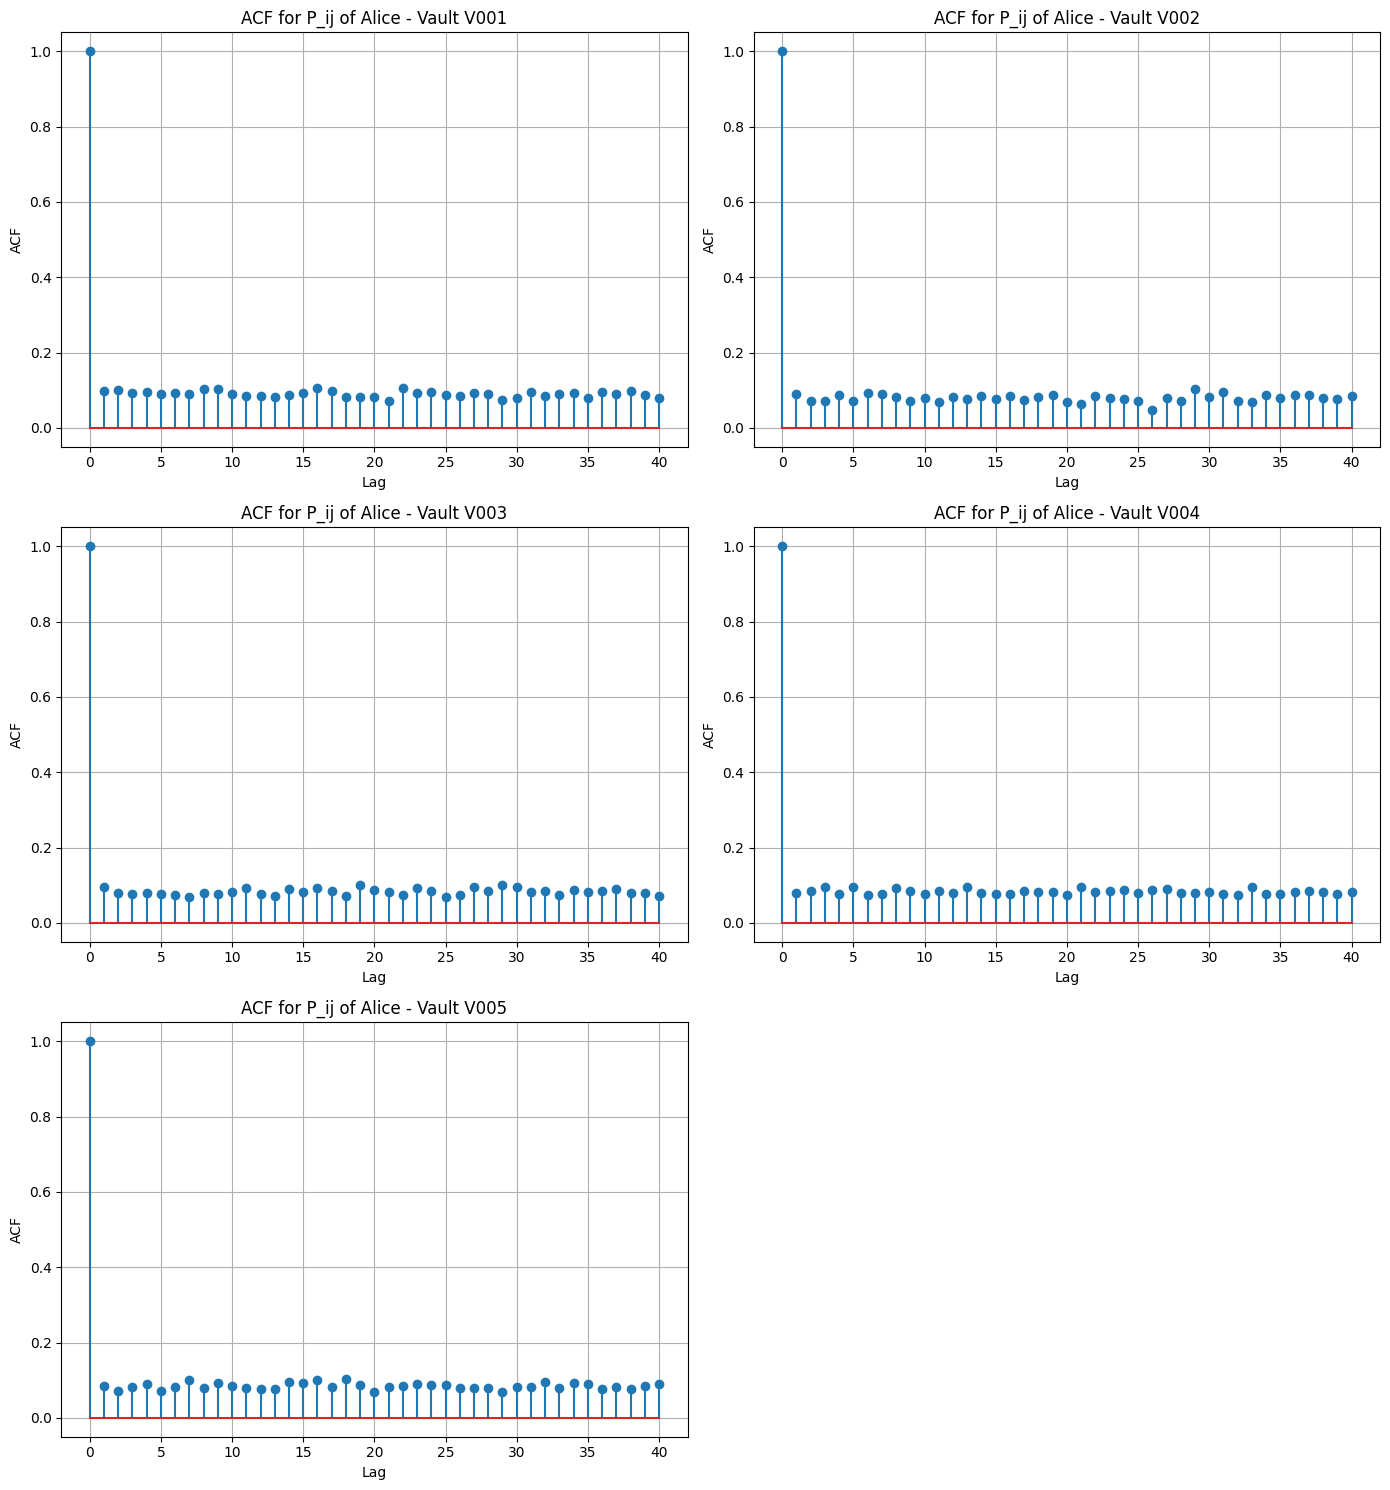

In [218]:
plot_pij_acfs(df_results, 'Alice')

The ACF (Autocorrelation Function) plots provided represent the autocorrelation of $ P_{ij} $ values across different lags for Alice in five different vaults (V001, V002, V003, V004, and V005). These plots are essential to assess the convergence and mixing properties of the Metropolis-Hastings algorithm used in the simulation.

#### Key Observations:

1. **Autocorrelation at Lag 0**:
   - As expected, the autocorrelation at lag 0 is 1.0 for all vaults. This is because each value is perfectly correlated with itself.

2. **Rapid Decay of Autocorrelation**:
   - Across all five vaults, the ACF shows a rapid decay after the first lag. By lag 1, the autocorrelation drops significantly, indicating that successive samples of \( P_{ij} \) are not highly correlated. This suggests that the algorithm has good mixing properties, meaning that each sample is relatively independent of the previous one.

3. **Low Autocorrelation for Higher Lags**:
   - Beyond the first lag, the autocorrelation remains low (close to zero) for all lags up to 40. This behavior is consistent across all vaults, suggesting that the Markov chain is well-mixed and that the samples are not stuck in any particular state.

4. **Comparison Across Vaults**:
   - The ACF patterns are remarkably similar across all vaults. The consistent rapid decay across all vaults reinforces the conclusion that the Metropolis-Hastings algorithm is effectively sampling the posterior distribution of \( P_{ij} \) without significant autocorrelation issues.

#### Conclusion:

The ACF plots demonstrate that the Metropolis-Hastings algorithm used in this analysis is effective, showing rapid decay in autocorrelation after the first lag. This indicates good mixing and suggests that the samples drawn for \( P_{ij} \) are relatively independent. The low autocorrelation across all vaults suggests that the results are reliable and not heavily dependent on previous samples, ensuring that the posterior distributions obtained are accurate and representative.
